In [1]:
#import relevant packages
import json
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
import sys
#Snippet to ignore warning messages in graphs
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [3]:
#change the size of the visualisations to make them big and more readable
plt.rcParams['figure.figsize'] = (20, 10)

# Task 1 - Follower Network

## (i) Construction

In [4]:
#load the friendships.csv file that indicates the friend/follower relations between pairs of list members
#it's also important to specify that the csv file is tab-separated and does not contain headers
friendships = pd.read_csv("friendships.csv", sep='\t', header = None)
friendships.head()

0              1
0    cambridge_uni    aberdeenuni
1      aberdeenuni  cambridge_uni
2     edinburghuni    aberdeenuni
3      aberdeenuni   edinburghuni
4  imperialcollege    aberdeenuni

As we can see, the friendships dataframe contains two columns, 0 and 1. Users in column 0 follow their respective users in column 1. For example, cambridge_uni follows aberdeenuni

In [5]:
#create a directed graph object called graph1
graph1 = nx.DiGraph()

#add edges from the friendships dataframe
for index, row in friendships.iterrows():
    graph1.add_edge(row[0], row[1])

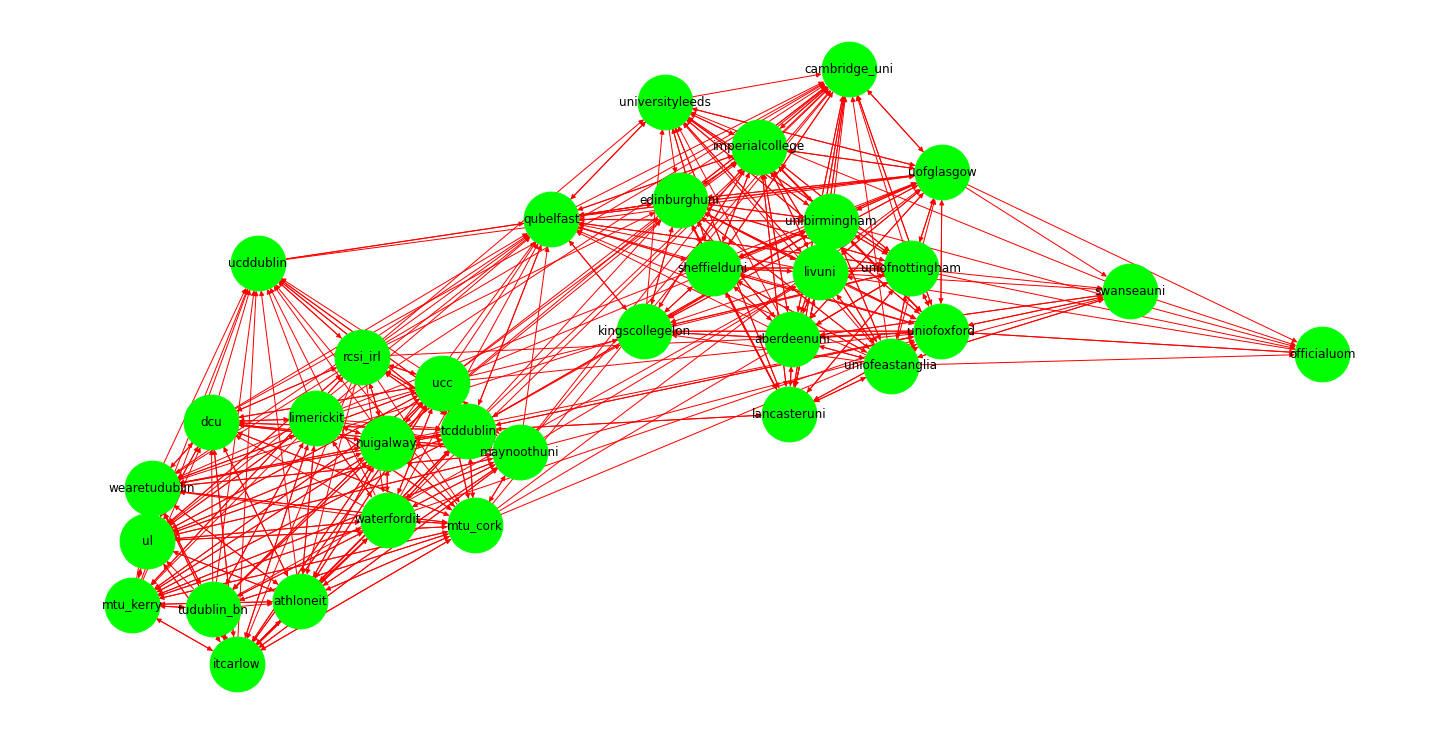

In [6]:
#draw the graph
nx.draw_spring(graph1, with_labels=True, node_color="lime", node_size=3000, edge_color='red')
plt.show()

## (ii) Characterisation

In [7]:
#print edges
for edge in graph1.edges:
    print(edge)

('cambridge_uni', 'aberdeenuni')
('cambridge_uni', 'imperialcollege')
('cambridge_uni', 'lancasteruni')
('cambridge_uni', 'livuni')
('cambridge_uni', 'sheffielduni')
('cambridge_uni', 'uniofoxford')
('cambridge_uni', 'uofglasgow')
('aberdeenuni', 'cambridge_uni')
('aberdeenuni', 'edinburghuni')
('aberdeenuni', 'imperialcollege')
('aberdeenuni', 'kingscollegelon')
('aberdeenuni', 'lancasteruni')
('aberdeenuni', 'livuni')
('aberdeenuni', 'qubelfast')
('aberdeenuni', 'sheffielduni')
('aberdeenuni', 'swanseauni')
('aberdeenuni', 'unibirmingham')
('aberdeenuni', 'uniofeastanglia')
('aberdeenuni', 'uniofnottingham')
('aberdeenuni', 'uniofoxford')
('aberdeenuni', 'universityleeds')
('aberdeenuni', 'uofglasgow')
('edinburghuni', 'aberdeenuni')
('edinburghuni', 'cambridge_uni')
('edinburghuni', 'imperialcollege')
('edinburghuni', 'kingscollegelon')
('edinburghuni', 'lancasteruni')
('edinburghuni', 'livuni')
('edinburghuni', 'qubelfast')
('edinburghuni', 'sheffielduni')
('edinburghuni', 'unibirm

In [8]:
#display number of nodes and edges of the graph as well as whether it's direceted or not
print(f"The network has {graph1.number_of_nodes()} nodes and {graph1.number_of_edges()} edges")
print(f"Is the graph directed? {nx.is_directed(graph1)}")

The network has 33 nodes and 454 edges
Is the graph directed? True


In [9]:
#display the density of the network
print(f"Density of Follower network: {nx.density(graph1)}")

Density of Follower network: 0.42992424242424243


In [10]:
#display the 5 most popular users in the network based on the in-degrees of each node
top5 = pd.Series(dict(graph1.in_degree()), name='In-Degree')
pd.DataFrame(top5).sort_values(by='In-Degree', ascending=False).head()

In-Degree
cambridge_uni         22
qubelfast             22
uniofoxford           22
tcddublin             18
edinburghuni          17

Here, we see that cambridge_uni, qubelfast and uniofoxford all have in-degrees of 22, meaning that they are followed by the most users in this particular network. Which does not necessarily mean that they have the most followers.

In [11]:
#display the 5 users with the best and worst in to out degree ratios

#create series for the in and out degrees of each node
in_ser = pd.Series(dict(graph1.in_degree()), name='In-Degree')
out_ser = pd.Series(dict(graph1.out_degree()), name='Out-Degree')

#create a dataframe by concatenating the two series along the x-axis (axis=1)
dataframe = pd.concat([in_ser, out_ser], axis=1)
    
#add the ratios to a new column in the dataframe
dataframe['Ratio of In to Out Degree'] = dataframe['In-Degree']/dataframe['Out-Degree']

#get the top and bottoom 5 ratios respectively and display them as dataframes
top5 = pd.DataFrame(dataframe).sort_values(by='Ratio of In to Out Degree', ascending=False).head()
bottom5 = pd.DataFrame(dataframe).sort_values(by='Ratio of In to Out Degree', ascending=True).head()
display(top5)
display(bottom5)

In-Degree  Out-Degree  Ratio of In to Out Degree
cambridge_uni         22           7                   3.142857
officialuom            6           2                   3.000000
ucddublin             15           6                   2.500000
qubelfast             22          11                   2.000000
uniofoxford           22          14                   1.571429

In-Degree  Out-Degree  Ratio of In to Out Degree
rcsi_irl                 8          18                   0.444444
limerickit               8          17                   0.470588
uniofeastanglia          9          16                   0.562500
tudublin_bn              8          13                   0.615385
ucc                     14          20                   0.700000

Here, we can see that cambridge_uni has the highest ratio of in to out degree in the network with over 3 followers per user followed, while rcsi_irl has the worst in to out degree ratio in the network with just 0.44 followers per user followed.

In [12]:
#function to create scatter plot with lines of best fit that has many independent variables
def scatter_line_independents(dependent, colours, markers, labels, x_label, y_label, title, *independents):
    #for each dependent variable
    for i in range(len(independents)):
        #create scatter plots for each dependent variable versus the independent variable
        plt.scatter(independents[i], dependent, color = colours[i], marker = markers[i], label = labels[i])
        #create the lines of best fit using the equation of a line (y = mx + c) by finding the slope and the y-intercept using
        #the numpy.polyfit() function
        m, c = np.polyfit(independents[i], dependent, 1)
        #plot the lines of best fit
        plt.plot(independents[i], m*independents[i] + c, color = colours[i])
    
    #label the x and y axes
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    plt.legend()
    plt.title(title)
    plt.show()
    
    #display the correlation coefficients
    for i in range(len(independents)):
        print(f'The correlation coefficient between the {labels[i]} and the {y_label} is {independents[i].corr(dependent)}')

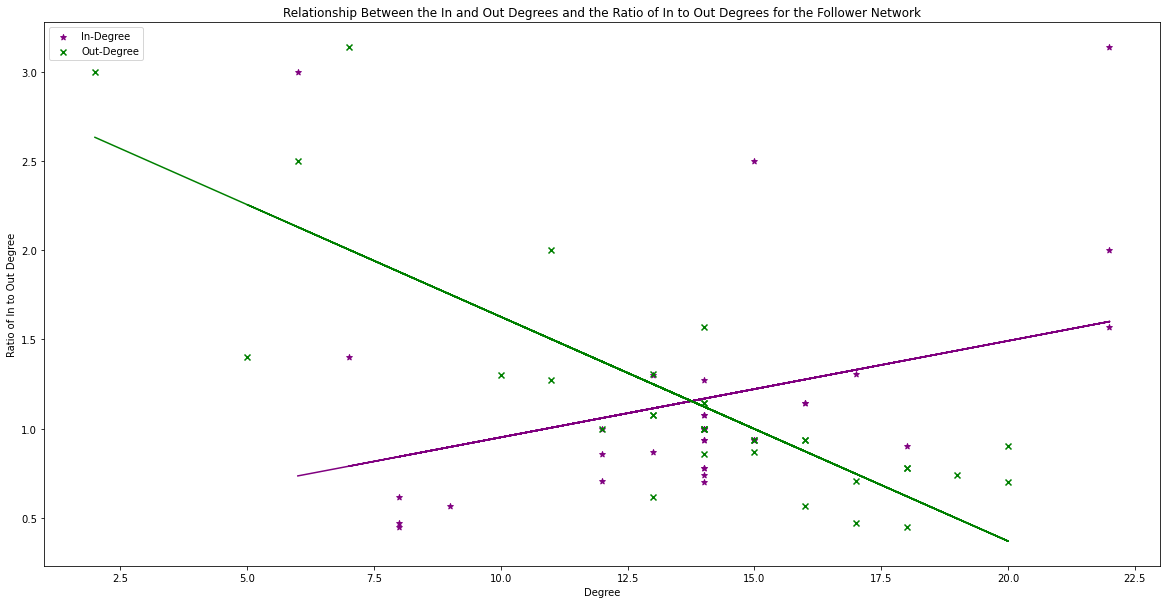

The correlation coefficient between the In-Degree and the Ratio of In to Out Degree is 0.32881258422582155
The correlation coefficient between the Out-Degree and the Ratio of In to Out Degree is -0.8177444943774287


In [13]:
#create lists for colours, markers and labels
colours = ['purple', 'green']
markers = ['*', 'x']
labels = ['In-Degree', 'Out-Degree']

#I would like to see the relationship between the in and out degrees
#and the ratio of in to out degrees in this network
scatter_line_independents(dataframe['Ratio of In to Out Degree'], colours, markers, labels, 'Degree', 
            'Ratio of In to Out Degree', 
            'Relationship Between the In and Out Degrees and the Ratio of In to Out Degrees for the Follower Network',
             in_ser, out_ser)

Here, we can see that with a correlation coefficient of just 0.33, the relationship between the in-degree and the ratio of in to out degree is quite weak, implying that the in-degree does not have a significant influence on the ratio of in to out degree of a node.
On the other hand, with a correlation coefficient of -0.82, the relationship between the out-degree and the ratio of in to out degree is strongly negative, implying that as the out degree increases, the ratio of in to out degree decreases - in other words, the more users a user follows, the more their ratio of in to out degree decreases.

In [14]:
#function to display ego graph, taking a graph and a node as arguments
def display_ego(graph, node):
    #create the ego network
    ego_graph = nx.ego_graph(graph, node)
    title = "Ego Network for %s (%d Nodes)" % (node, ego_graph.number_of_nodes())
    plt.title(title, fontsize=14)
    #layout all nodes using spring layout
    pos = nx.spring_layout(ego_graph)
    #draw the full network
    nx.draw(ego_graph, pos, with_labels=True, node_color='lime', edge_color='red')
    #draw the ego node in yellow and with a larger size
    nx.draw_networkx_nodes(ego_graph, pos, nodelist=[node], node_size=1000, node_color="yellow")
    plt.show()
    #return the ego graph
    return ego_graph

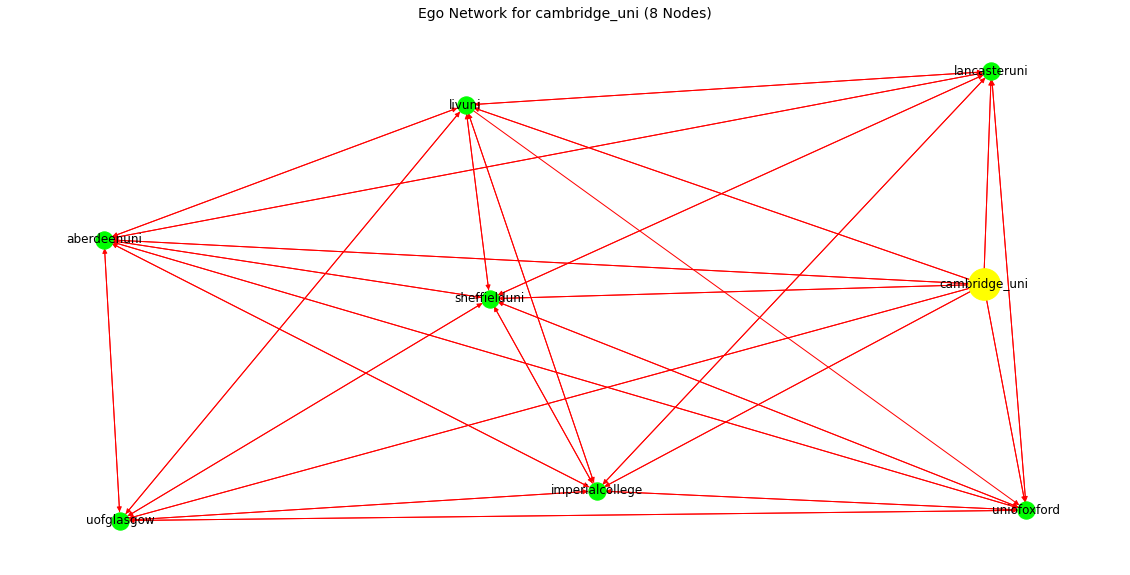

In [15]:
#display the ego graph for cambridge_uni, since it had the most followers in the network
#as well as the highest in to out degree ratio
ego = display_ego(graph1, 'cambridge_uni')

Here, we can see the 7 users cambridge_uni follows in this network

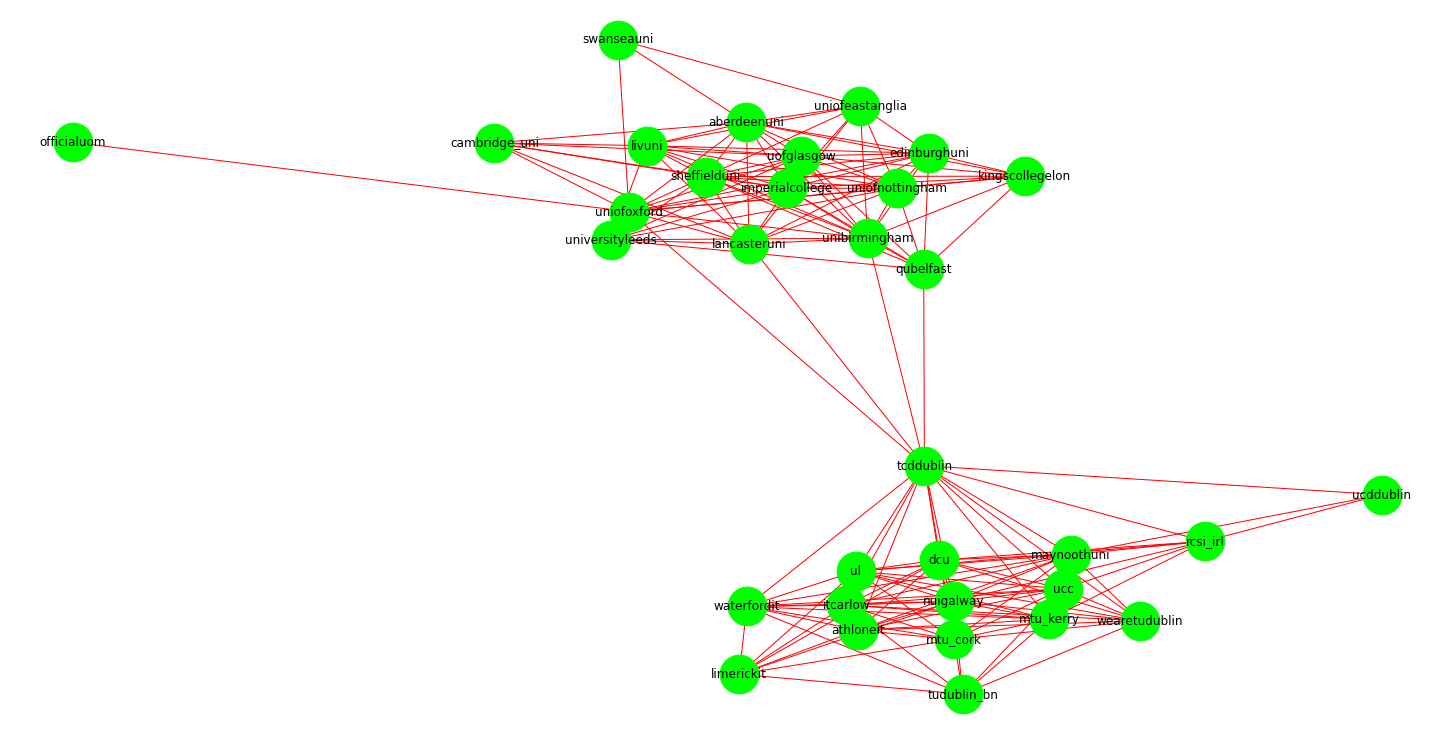

In [16]:
#create an undirected graph from the follower network, whereby every edge represents
#a mutual relationship (userA followes userB and vice versa)
mutual = graph1.to_undirected(reciprocal=True)

#draw the graph
nx.draw_spring(mutual, with_labels=True, node_color='lime', node_size=1500, edge_color='red')

In [17]:
print(f"The mutual graph has {mutual.number_of_nodes()} nodes and {mutual.number_of_edges()} edges")

The mutual graph has 33 nodes and 177 edges


In [18]:
#display the density of the network
print(f"Density of Mutual network: {nx.density(mutual)}")

Density of Mutual network: 0.3352272727272727


In [19]:
#function to print the top n nodes with the highest degree centrality
def degCentrality_descending(graph, n):
    #display floats in pandas series to within 6 decimal places
    pd.options.display.float_format='{:,.6f}'.format
    #create a series of all the degree centralities of each node
    s_deg = pd.Series(nx.degree_centrality(graph))
    print(s_deg.sort_values(ascending=False).head(n))

In [20]:
#function to print the top n nodes with the highest closeness centrality
def closeCentrality_descending(graph, n):
    #display floats in pandas series to within 6 decimal places
    pd.options.display.float_format='{:,.6f}'.format
    #create a series of all the closeness centralities of each node
    s_close = pd.Series(nx.closeness_centrality(graph))
    print(s_close.sort_values(ascending=False).head(n))

In [21]:
#function to print the top n nodes with the highest betweenness centrality
def betwCentrality_descending(graph, n):
    #display floats in pandas series to within 6 decimal places
    pd.options.display.float_format='{:,.6f}'.format
    #create a series of all the betweenness centralities of each node
    s_betw = pd.Series(nx.betweenness_centrality(graph))
    print(s_betw.sort_values(ascending=False).head(n))

In [22]:
#function to print the top n nodes with the highest eigenvector centrality
def eigCentrality_descending(graph, n):
    #display floats in pandas series to within 6 decimal places
    pd.options.display.float_format='{:,.6f}'.format
    #create a series of all the eigenvector centralities of each node
    s_eig = pd.Series(nx.eigenvector_centrality(graph))
    print(s_eig.sort_values(ascending=False).head(n))

In [23]:
degCentrality_descending(graph1, 5)

tcddublin     1.187500
uniofoxford   1.125000
ucc           1.062500
nuigalway     1.031250
qubelfast     1.031250
dtype: float64


Here, we can see that tcddublin has the highest degree centrality meaning that they are followed by and follow the most users in this network

In [24]:
closeCentrality_descending(graph1, 5)

cambridge_uni   0.761905
uniofoxford     0.761905
qubelfast       0.761905
tcddublin       0.695652
edinburghuni    0.680851
dtype: float64


Here, we see that cambridge_uni, uniofoxford and qubelfast all share the highest closest centralities which is interesting because these users were also the users who shared the most followers

In [25]:
betwCentrality_descending(graph1, 5)

tcddublin       0.287241
uniofoxford     0.119424
qubelfast       0.067209
unibirmingham   0.053975
lancasteruni    0.043735
dtype: float64


Here, we can see that tcddublin has the highest betweenness centrality, meaning that their node occurs on the most shortest paths between other nodes in the network. This might be related to the fact that tcddublin also has the highest degree centrality

In [26]:
eigCentrality_descending(graph1, 5)

uniofoxford       0.299253
cambridge_uni     0.285256
imperialcollege   0.259486
qubelfast         0.257215
edinburghuni      0.254703
dtype: float64


Here, we can see that uniofoxford has the highest eigenvector centrality, meaning that their node is connected to the most central nodes in the network

Having examined the various centrality measures of this network, I think it might be worth examining the relationship between the number of followers a user has and their closeness centrality in this network

In [27]:
#function to create scatter plot with lines of best fit
def scatter_line(independent, colours, markers, labels, x_label, y_label, title, *dependents):
    #for each dependent variable
    for i in range(len(dependents)):
        #create scatter plots for each dependent variable versus the independent variable
        plt.scatter(independent, dependents[i], color = colours[i], marker = markers[i], label = labels[i])
        #create the lines of best fit using the equation of a line (y = mx + c) by finding the slope and the y-intercept using
        #the numpy.polyfit() function
        m, c = np.polyfit(independent, dependents[i], 1)
        #plot the lines of best fit
        plt.plot(independent, m*independent + c, color = colours[i])
    
    #label the x and y axes
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    plt.legend()
    plt.title(title)
    plt.show()
    
    #display the correlation coefficients
    for i in range(len(dependents)):
        print(f'The correlation coefficient between the {x_label} and the {labels[i]} is {independent.corr(dependents[i])}')

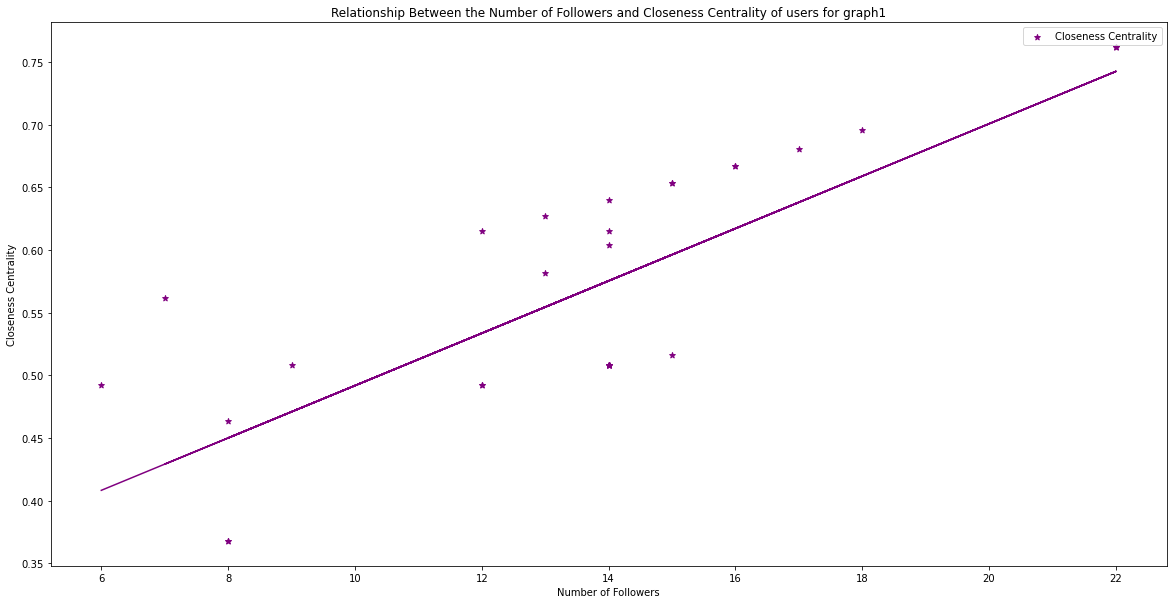

The correlation coefficient between the Number of Followers and the Closeness Centrality is 0.7925843322735352


In [28]:
#create lists for colours, markers and labels
colours = ['purple']
markers = ['*']
labels = ['Closeness Centrality']

#create series for the in degrees and degree centralities of each node
followers = pd.Series(dict(graph1.in_degree()), name='followers')
close = pd.Series(dict(nx.closeness_centrality(graph1)), name='close')

#create a dataframe by concatenating the two series along the x-axis (axis=1)
df = pd.concat([followers, close], axis=1)

#I would like to see the relationship between the number of followers
#and the closeness centrality for graph1
scatter_line(df['followers'], colours, markers, labels, 'Number of Followers', 'Closeness Centrality', 
             'Relationship Between the Number of Followers and Closeness Centrality of users for graph1',
             df['close'])

Here, we can see that the correlation coefficient between the number of followers and the closeness centrality is 0.79, meaning that the relationship is strong. This implies that the number of followers does have an impact on the closeness centrality in this graph

# Task 2 - Reply Network

## (i) Construction

In [29]:
#function to parse create data frame from jsonl file
def create_df_from_jsonl(jsonl):
    #parse the jsonl file
    data = open(jsonl, 'r')
    
    #create an empty list to store tweets
    rows = []
    
    #strip each line in the jsonl file and add it to the list
    for line in data.readlines():
        line = line.strip()
        #each line contains a JSON document, representing a single tweet
        tweet = json.loads(line)
        rows.append(tweet)
    data.close
    
    #create and return the dataframe
    return pd.DataFrame(rows)

In [30]:
#create a dataframe from the json file
tweets = create_df_from_jsonl('tweets.jsonl')

#display the names of the columns so we can get a good idea of which ones we will need to use
tweets.columns

Index(['created_at', 'id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'extended_entities', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'possibly_sensitive', 'lang',
       'retweeted_status', 'quoted_status_id', 'quoted_status_id_str',
       'quoted_status_permalink', 'quoted_status'],
      dtype='object')

Looking at the names of these columns, it seems as though in order to create a reply network, we'll need the user, the in_reply_to_screen_name and the in_reply_to_user_id columns

In [31]:
tweets['user'].head(10)

0    {'id': 245831039, 'id_str': '245831039', 'name...
1    {'id': 95665759, 'id_str': '95665759', 'name':...
2    {'id': 15353955, 'id_str': '15353955', 'name':...
3    {'id': 70713759, 'id_str': '70713759', 'name':...
4    {'id': 19705196, 'id_str': '19705196', 'name':...
5    {'id': 245831039, 'id_str': '245831039', 'name...
6    {'id': 26753142, 'id_str': '26753142', 'name':...
7    {'id': 36943804, 'id_str': '36943804', 'name':...
8    {'id': 20427406, 'id_str': '20427406', 'name':...
9    {'id': 22132266, 'id_str': '22132266', 'name':...
Name: user, dtype: object

So as we can see, this column contains a dictionary and one of its keys is 'screen_name' which I think will useful for the replies visualisation as we can use the values of this key to name the nodes, I also think the 'id' key will be useful

In [32]:
#create a list of names from the user column - representing the screen names of those who replied

#start by creating an empty list to store the names
names = []

for index, row in tweets.iterrows():
    names.append(row['user']['screen_name'])

In [33]:
tweets['names'] = names
tweets['names'].head(10)

0        waterfordit
1      WeAreTUDublin
2    imperialcollege
3                DCU
4                UCC
5        waterfordit
6          MTU_Kerry
7          QUBelfast
8        aberdeenuni
9          ucddublin
Name: names, dtype: object

In [34]:
#create a list of ids from the user column - representing the ids of those who replied

#start by creating an empty list to store the ids
ids = []

for index, row in tweets.iterrows():
    ids.append(row['user']['id'])

In [35]:
tweets['ids'] = ids
tweets['ids'].head(10)

0    245831039
1     95665759
2     15353955
3     70713759
4     19705196
5    245831039
6     26753142
7     36943804
8     20427406
9     22132266
Name: ids, dtype: int64

In [36]:
tweets['in_reply_to_screen_name'].head(10)

0           None
1           None
2           None
3           None
4           None
5           None
6           None
7       news_RSE
8    aberdeenuni
9           None
Name: in_reply_to_screen_name, dtype: object

We can see here that this column contains the usernames of the users to which the first user replied to

In [37]:
tweets['in_reply_to_user_id'].head(10)

0                  nan
1                  nan
2                  nan
3                  nan
4                  nan
5                  nan
6                  nan
7   269,740,289.000000
8    20,427,406.000000
9                  nan
Name: in_reply_to_user_id, dtype: float64

We can see here that this column contains the ids of the users to which the first user replied to

In [38]:
#create a new dataframe with only the columns we need
tweets_cond = pd.concat([tweets['ids'], tweets['names'], tweets['in_reply_to_user_id'], tweets['in_reply_to_screen_name']], axis=1)
tweets_cond.head(25)

ids            names  in_reply_to_user_id in_reply_to_screen_name
0    245831039      waterfordit                  nan                    None
1     95665759    WeAreTUDublin                  nan                    None
2     15353955  imperialcollege                  nan                    None
3     70713759              DCU                  nan                    None
4     19705196              UCC                  nan                    None
5    245831039      waterfordit                  nan                    None
6     26753142        MTU_Kerry                  nan                    None
7     36943804        QUBelfast   269,740,289.000000                news_RSE
8     20427406      aberdeenuni    20,427,406.000000             aberdeenuni
9     22132266        ucddublin                  nan                    None
10    25521930     LancasterUni   104,453,420.000000          SociologyLancs
11    36943804        QUBelfast                  nan                    None
12    95665759    WeAreTUDublin                  nan                    None
13    23426889     EdinburghUni                  nan                    None
14    31537951        tcddublin                  nan                    None
15    33697736  UniversityLeeds 1,329,703,297.000000              rabyabegum
16    19705196              UCC                  nan                    None
17    22624441  KingsCollegeLon                  nan                    None
18   189653715         MTU_Cork                  nan                    None
19   189653715         MTU_Cork                  nan                    None
20    19760151       UofGlasgow                  nan                    None
21   501809067       LimerickIT                  nan                    None
22   128496277      TUDublin_BN                  nan                    None
23  2217874898      OfficialUoM 4,062,872,097.000000                 gbareli
24    33474655    Cambridge_Uni                  nan                    None

As we can see, this data frame contains many rows with NaNs, we should create a new table which contains no NaNs in order for meaningful visualisations to be created. However, there are also users who reply to themselves, I think these instances should also be removed, my approach to doing this will be to assign any instances of this with NaN, then use dropna to remove all instances of NaN.

In [39]:
#function to remove rows in which users reply to themselves, aswell as other instances
#where rows contain NaNs
def rem_rep_to_self(df):
    #iterate over each row in the data frame
    for row in range(len(df)):
        #if we come across a row where the 'ids' column is equal to the
        #'in_reply_to_user_id' column, assign it a NaN value
        if df.iloc[row, 0] == df.iloc[row, 2]:
            df.iloc[row, 0] = None
    #drop all rows with NaN values
    new = df.dropna()
    return new

In [40]:
useful = rem_rep_to_self(tweets_cond)
useful.head(25)

ids            names              in_reply_to_user_id  \
7      36,943,804.000000        QUBelfast               269,740,289.000000   
10     25,521,930.000000     LancasterUni               104,453,420.000000   
15     33,697,736.000000  UniversityLeeds             1,329,703,297.000000   
23  2,217,874,898.000000      OfficialUoM             4,062,872,097.000000   
34     17,865,542.000000    unibirmingham                21,191,528.000000   
36  2,217,874,898.000000      OfficialUoM             1,410,976,422.000000   
47     33,697,736.000000  UniversityLeeds             3,350,913,707.000000   
56     48,289,662.000000      UniofOxford                27,249,134.000000   
76     22,624,441.000000  KingsCollegeLon                19,760,323.000000   
81     48,289,662.000000      UniofOxford                19,610,546.000000   
91     18,903,739.000000           LivUni               378,186,078.000000   
95     48,289,662.000000      UniofOxford             1,548,349,087.000000   
102    22,624,441.000000  KingsCollegeLon               898,362,656.000000   
106    48,289,662.000000      UniofOxford   759,773,314,986,438,656.000000   
116    62,489,200.000000       SwanseaUni   898,068,541,869,576,192.000000   
120    19,760,151.000000       UofGlasgow                51,921,458.000000   
148    48,289,662.000000      UniofOxford             3,091,835,837.000000   
186    18,903,739.000000           LivUni                34,726,108.000000   
196    19,760,151.000000       UofGlasgow             2,288,185,494.000000   
197    19,760,151.000000       UofGlasgow 1,123,157,387,127,472,128.000000   
200    48,289,662.000000      UniofOxford               307,414,272.000000   
211    22,132,266.000000        ucddublin             2,605,708,157.000000   
220    48,289,662.000000      UniofOxford 1,090,330,315,279,654,912.000000   
222    19,760,151.000000       UofGlasgow               612,989,413.000000   
229 2,217,874,898.000000      OfficialUoM   950,452,551,324,979,200.000000   

    in_reply_to_screen_name  
7                  news_RSE  
10           SociologyLancs  
15               rabyabegum  
23                  gbareli  
34          aroundthehouses  
36                 jessxwho  
47               estherroox  
56            HiImCharlotte  
76               ninastibbe  
81                  chachat  
91          shahzadomerkhan  
95           LondonNathalia  
102          ArkBolingbroke  
106               ECSBiddan  
116         StuartW29013075  
120               cimiculka  
148           KBA_Sixthform  
186          DanBurtonMusic  
196            AaronMarkMcG  
197             AmberHinde_  
200            InYaFace_Jim  
211               DianaMrza  
220             izzygrandic  
222           JackieKayPoet  
229         melissaevesingh

In [41]:
#display usernames in int format rather than scientific notation
pd.set_option('display.float_format', lambda x: '%d' % x)

In [42]:
useful.head(25)

ids            names  in_reply_to_user_id in_reply_to_screen_name
7     36943804        QUBelfast            269740289                news_RSE
10    25521930     LancasterUni            104453420          SociologyLancs
15    33697736  UniversityLeeds           1329703297              rabyabegum
23  2217874898      OfficialUoM           4062872097                 gbareli
34    17865542    unibirmingham             21191528         aroundthehouses
36  2217874898      OfficialUoM           1410976422                jessxwho
47    33697736  UniversityLeeds           3350913707              estherroox
56    48289662      UniofOxford             27249134           HiImCharlotte
76    22624441  KingsCollegeLon             19760323              ninastibbe
81    48289662      UniofOxford             19610546                 chachat
91    18903739           LivUni            378186078         shahzadomerkhan
95    48289662      UniofOxford           1548349087          LondonNathalia
102   22624441  KingsCollegeLon            898362656          ArkBolingbroke
106   48289662      UniofOxford   759773314986438656               ECSBiddan
116   62489200       SwanseaUni   898068541869576192         StuartW29013075
120   19760151       UofGlasgow             51921458               cimiculka
148   48289662      UniofOxford           3091835837           KBA_Sixthform
186   18903739           LivUni             34726108          DanBurtonMusic
196   19760151       UofGlasgow           2288185494            AaronMarkMcG
197   19760151       UofGlasgow  1123157387127472128             AmberHinde_
200   48289662      UniofOxford            307414272            InYaFace_Jim
211   22132266        ucddublin           2605708157               DianaMrza
220   48289662      UniofOxford  1090330315279654912             izzygrandic
222   19760151       UofGlasgow            612989413           JackieKayPoet
229 2217874898      OfficialUoM   950452551324979200         melissaevesingh

In [43]:
#create a directed graph object called repGraph1
repGraph1 = nx.DiGraph()

#add edges from the useful dataframe
for index, row in useful.iterrows():
    repGraph1.add_edge(row[1], row[3])

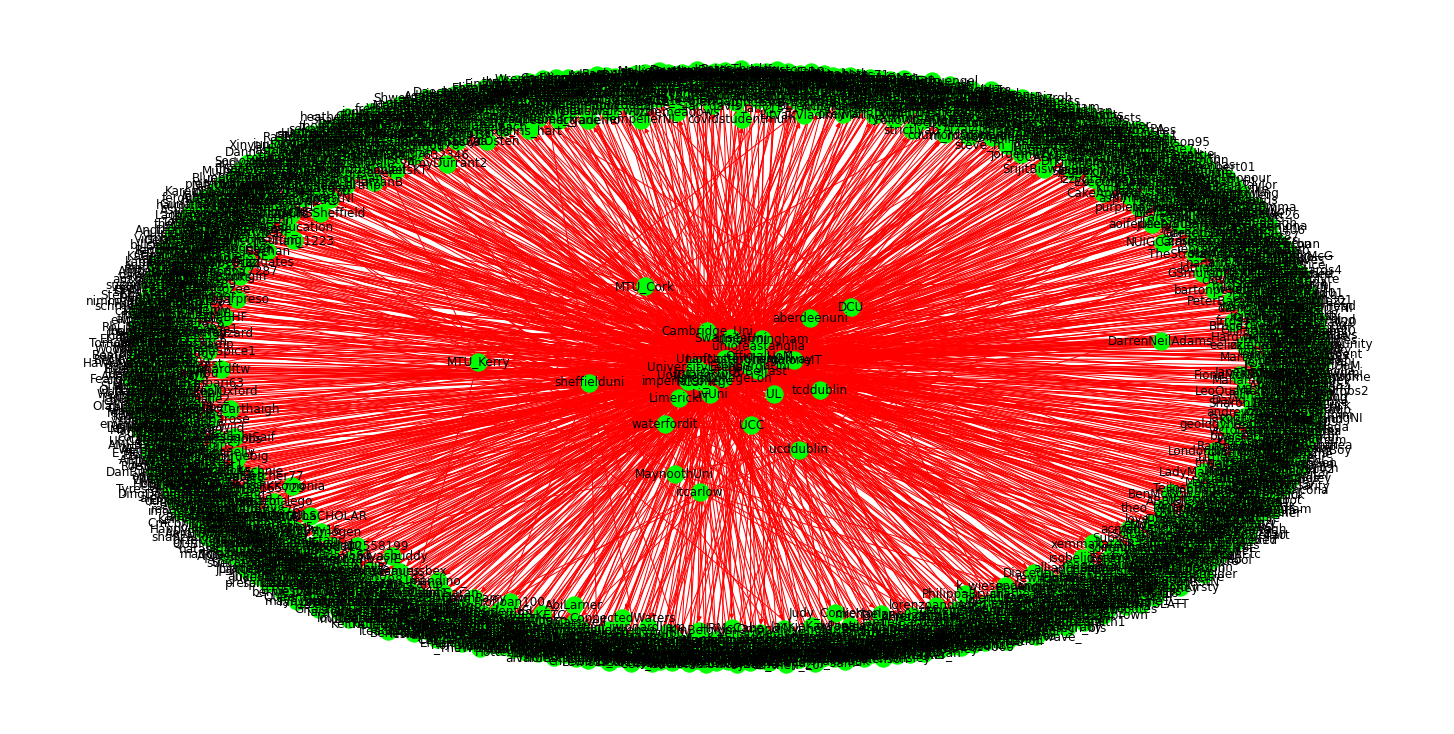

In [44]:
#draw the graph
nx.draw_spring(repGraph1, with_labels=True, node_color="lime", edge_color='red')
plt.show()

This graph visualises the users who replied to other users from the tweets.jsonl file

Next, I'll create a graph to visualise users in the tweets.jsonl file who are replied to

In [45]:
#create a dataframe from the json file
members = create_df_from_jsonl('list_members.jsonl')

#display the names of the columns so we can get a good idea of which ones we will need to use
members.columns

Index(['id', 'id_str', 'name', 'screen_name', 'location', 'description', 'url',
       'entities', 'protected', 'followers_count', 'friends_count',
       'listed_count', 'created_at', 'favourites_count', 'utc_offset',
       'time_zone', 'geo_enabled', 'verified', 'statuses_count', 'lang',
       'status', 'contributors_enabled', 'is_translator',
       'is_translation_enabled', 'profile_background_color',
       'profile_background_image_url', 'profile_background_image_url_https',
       'profile_background_tile', 'profile_image_url',
       'profile_image_url_https', 'profile_banner_url', 'profile_link_color',
       'profile_sidebar_border_color', 'profile_sidebar_fill_color',
       'profile_text_color', 'profile_use_background_image',
       'has_extended_profile', 'default_profile', 'default_profile_image',
       'following', 'follow_request_sent', 'notifications', 'translator_type'],
      dtype='object')

Looking at these column names, it looks like we can use an inner join to merge this data frame with the useful data frame on the 'id' column, to do this, we'll need to change the name of the 'id' column in this data frame to 'in_reply_to_user_id'

In [46]:
#rename the 'id' column to 'in_reply_to_user_id'
members_rename = members.rename(columns={'id': 'in_reply_to_user_id'})

In [47]:
#use an inner join to join the two data frames
replied_from_list = pd.merge(useful, members_rename['in_reply_to_user_id'], on='in_reply_to_user_id')
replied_from_list

ids       names  in_reply_to_user_id in_reply_to_screen_name
0 36943804   QUBelfast             17260575               nuigalway
1 19760151  UofGlasgow             48289662             UniofOxford
2 31961886   AthloneIT             33474655           Cambridge_Uni
3 31961886   AthloneIT             33474655           Cambridge_Uni
4 36943804   QUBelfast             19705196                     UCC

Here, we can see that there are only 5 instances in which a university from the members list has replied to another university from the members list

In [48]:
#create a directed graph object called repGraph2
repGraph2 = nx.DiGraph()

#add edges from the replier_from_list dataframe
for index, row in replied_from_list.iterrows():
    repGraph2.add_edge(row[1], row[3])

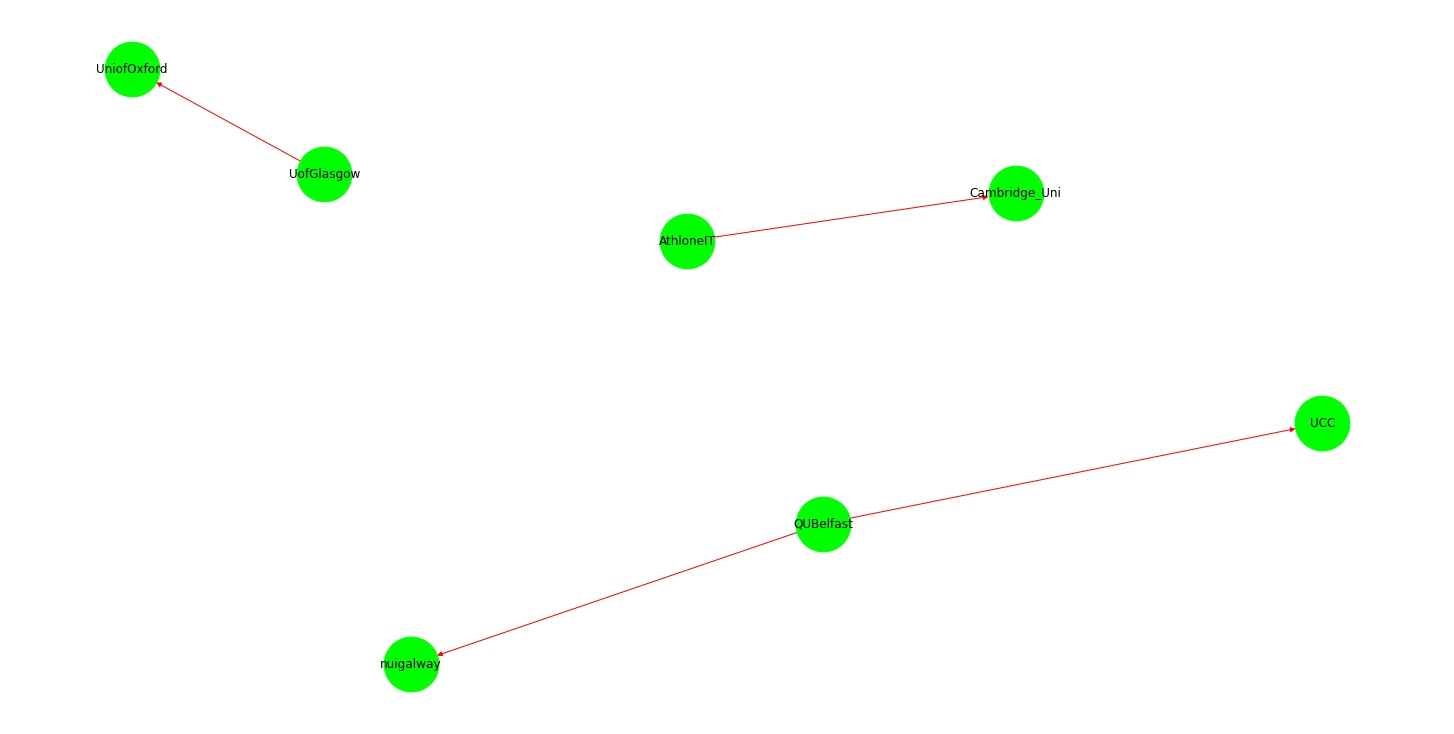

In [49]:
#draw the graph
nx.draw_spring(repGraph2, with_labels=True, node_color="lime", node_size=3000, edge_color='red')
plt.show()

As we can see, this graph is much easier to decode than the previous graph, with just 7 nodes and 4 edges

## (ii) Characterisation

In [50]:
#get the number of nodes and edges of the first reply graph
print(f"The first reply graph has {repGraph1.number_of_nodes()} nodes and {repGraph1.number_of_edges()} edges")

The first reply graph has 1644 nodes and 1626 edges


In [51]:
#get the density of the first reply graph
print(f"The density of the first reply graph is {nx.density(repGraph1)}")

The density of the first reply graph is 0.0006019787552589841


In [52]:
#get the top 5 users who received the most replies
top5 = pd.Series(dict(repGraph1.in_degree()), name='Replies Received')
pd.DataFrame(top5).sort_values(by='Replies Received', ascending=False).head()

Replies Received
sophie_howaard                 2
ArkIsaacNewton                 2
_alexiabis                     2
BantshireUni                   2
DannyReeves11                  2

Interestingly, in this network, the most amount of repleis received by any user was just 2 replies

In [53]:
#get the top 5 users who replied to users in the network the most
top5 = pd.Series(dict(repGraph1.out_degree()), name='Replies Made')
pd.DataFrame(top5).sort_values(by='Replies Made', ascending=False).head()

Replies Made
UniofOxford            271
OfficialUoM            191
QUBelfast              140
LancasterUni           121
SwanseaUni             118

As we can see, UniofOxford contributed the most in terms of replying to other users in the network

In [54]:
#get the top 10 nodes with the highest degree centralities
degCentrality_descending(repGraph1, 10)

UniofOxford       0.165551
OfficialUoM       0.116251
QUBelfast         0.085210
LancasterUni      0.073646
SwanseaUni        0.071820
EdinburghUni      0.061473
KingsCollegeLon   0.057212
LivUni            0.053561
uniofeastanglia   0.045648
UofGlasgow        0.043214
dtype: float64


Here, we can see that UniofOxford has the highest degree centrality, meaning that their node has the most edges in the graph which makes sense since UniofOxford also made the most replies

In [55]:
#get the top 10 nodes with the highest closeness centralities
closeCentrality_descending(repGraph1, 10)

MatthewPFirth     0.001623
_alexiabis        0.001623
sophie_howaard    0.001217
DannyReeves11     0.001217
BantshireUni      0.001217
ValeBonilla1105   0.001217
ArkBolingbroke    0.001217
ArkIsaacNewton    0.001217
FindAUniversity   0.001217
Silvasbuddy       0.001217
dtype: float64


Here, we can see that MatthewPFirth and _alexiabis share the highest closeness centralities, meaning that their nodes are closest to all other nodes in the network

In [56]:
#get the top 10 nodes with the highest betweenness centralities
betwCentrality_descending(repGraph1, 10)

UniofOxford       0.000100
Cambridge_Uni     0.000007
nuigalway         0.000004
UCC               0.000003
Datactics_        0.000000
DrBile1           0.000000
HeathertheHeron   0.000000
PollyRippon       0.000000
karim_boustani    0.000000
GarnetLDesigns    0.000000
dtype: float64


Here, we can see that UniofOxford has by far the highest betweenness centrality, meaning that their node occurs on the most shortest paths between other nodes in the network

Upon trying to compute the eigenvector centralities of the graph, I was unable to do so because of the following error:
PowerIterationFailedConvergence: (PowerIterationFailedConvergence(...), 'power iteration failed to converge within 100 iterations')

UniofOxford appears to be quite an important node in this graph so it may be worth constructing an ego network around it

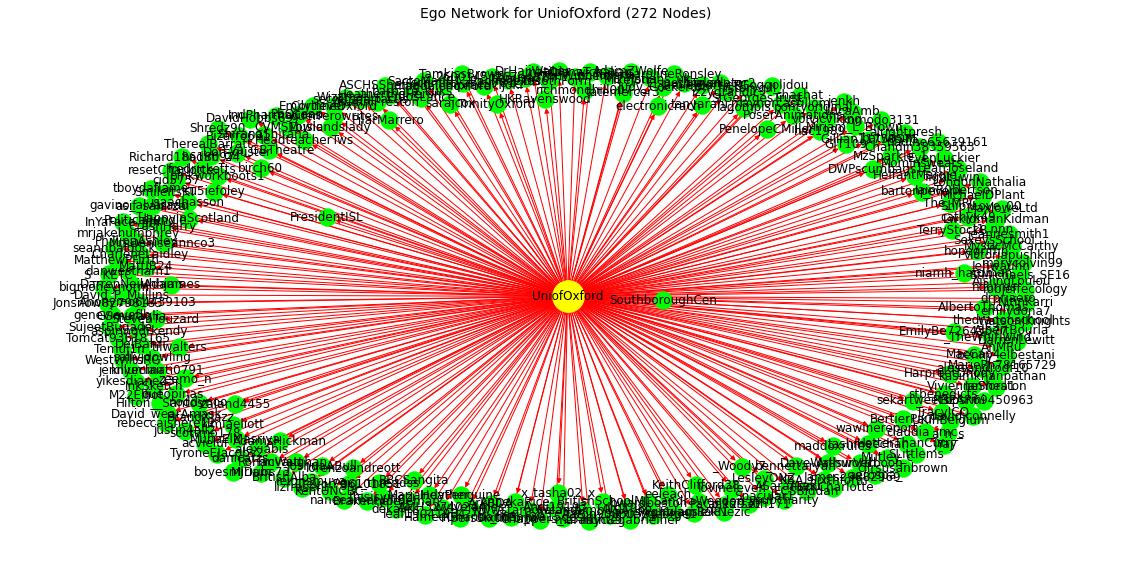

In [57]:
#display the ego graph for Uniofoxford
ego = display_ego(repGraph1, 'UniofOxford')

Here we can see all the users to which UniofOxford replied

In [58]:
#get the number of nodes and edges of the second reply graph as well as its density
print(f"There are {repGraph2.number_of_nodes()} nodes and {repGraph2.number_of_edges()} edges in the second reply graph")
print(f"The densit of the second reply graph is {nx.density(repGraph2)}")

There are 7 nodes and 4 edges in the second reply graph
The densit of the second reply graph is 0.09523809523809523


# Task 3 - Mention Network

## (i) Construction

In [59]:
#create a directed graph object called menGraph1
menGraph1 = nx.DiGraph()

#add edges to graph iteratively
for index, row in tweets.iterrows():
    for element in range(len(row['entities']['user_mentions'])):
        #avoid adding edges between nodes with the same id
        if row['user']['id'] == row['entities']['user_mentions'][element]['id']:
            continue
        else:
            menGraph1.add_edge(row['user']['screen_name'], row['entities']['user_mentions'][element]['screen_name'])

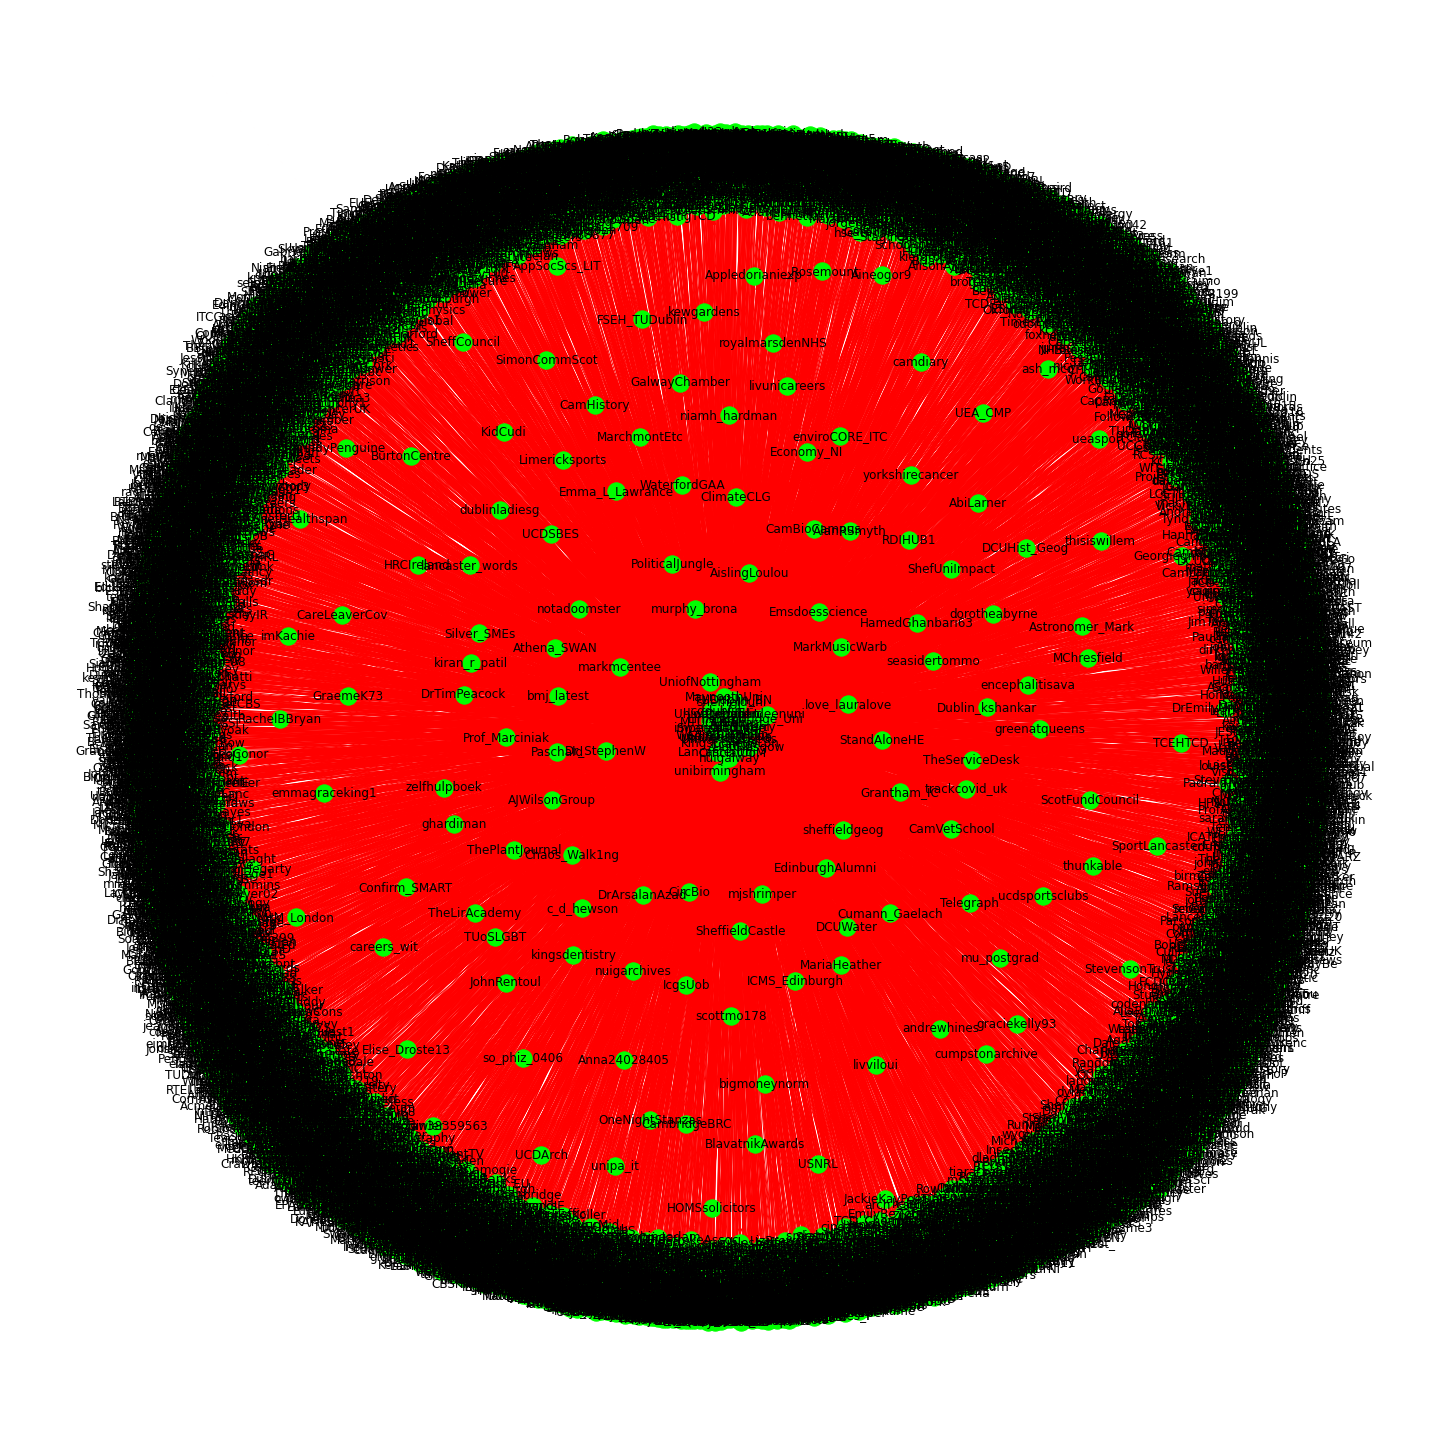

In [60]:
#draw the graph, making the figure size larger to view nodes and edges more clearly
plt.figure(figsize=(20,20)) 
nx.draw_spring(menGraph1, with_labels=True, node_color="lime", edge_color='red')
plt.show()

This graph visualises the users mentioned other users from the tweets.jsonl file

Next, I would like to visualise the users who mentioned users from the members list

In [61]:
#create a list of ids from the members list

#create an empty list to store the ids
members_id = []

for index, row in members.iterrows():
    members_id.append(row['id'])

In [62]:
#create a directed graph object called rmenGraph2
menGraph2 = nx.DiGraph()

#add edges to graph iteratively
for index, row in tweets.iterrows():
    for element in range(len(row['entities']['user_mentions'])):
        #avoid adding edges between nodes with the same id and
        #avoid adding edges between nodes that are not in the members list
        if row['user']['id'] == row['entities']['user_mentions'][element]['id']:
            continue
        elif row['entities']['user_mentions'][element]['id'] not in members_id:
            continue
        else:
            menGraph2.add_edge(row['user']['screen_name'], row['entities']['user_mentions'][element]['screen_name'])

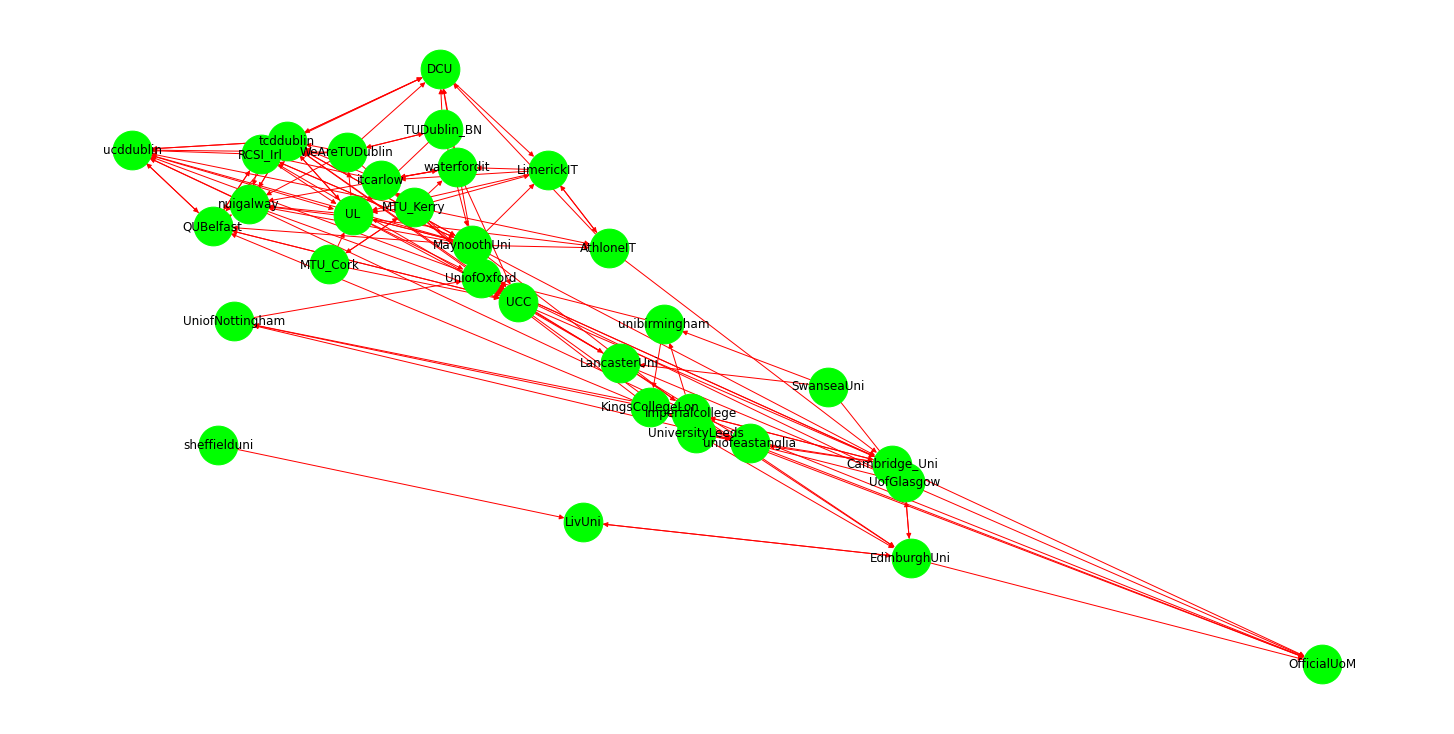

In [63]:
#draw the graph
nx.draw_spring(menGraph2, with_labels=True, node_color="lime", node_size=1500, edge_color='red')
plt.show()

As we can see, this graph is much easier to decode than the previous graph

## (ii) Characterisation

In [64]:
#display the number of nodes and edges in the first mention graph as well as wheter it's directed or not
print(f"The first mention graph has {menGraph1.number_of_nodes()} nodes and {menGraph1.number_of_edges()} edges")
print(f"Is the first mention graph directed? {nx.is_directed(menGraph1)}")

The first mention graph has 7889 nodes and 9080 edges
Is the first mention graph directed? True


In [65]:
#display the density of the first mention graph 
print(f"The density of the first mention graph is {nx.density(menGraph1)}")

The density of the first mention graph is 0.00014591400921045222


In [66]:
#get the top 5 users were mentioned the most
top5 = pd.Series(dict(menGraph1.in_degree()), name='Number of Times Mentioned')
pd.DataFrame(top5).sort_values(by='Number of Times Mentioned', ascending=False).head()

Number of Times Mentioned
scienceirel                            15
SimonHarrisTD                          15
DeptofFHed                             14
IrishResearch                          13
ConversationUK                         13

Here, we can see that both scienceirel and SimonHarrisTD received the most mentions in the network

In [67]:
#get the top 5 users who mentioned the most users
top5 = pd.Series(dict(menGraph1.out_degree()), name='Number of Users Mentioned')
pd.DataFrame(top5).sort_values(by='Number of Users Mentioned', ascending=False).head()

Number of Users Mentioned
Cambridge_Uni                        467
UniofOxford                          423
ucddublin                            414
UofGlasgow                           404
SwanseaUni                           368

Here, we can see that Cambridge_Uni mentioned other users the most in their tweets

In [68]:
#get the top 10 nodes with the highest degree centralities
degCentrality_descending(menGraph1, 10)

Cambridge_Uni     0.059965
UniofOxford       0.054767
ucddublin         0.053626
UofGlasgow        0.051724
SwanseaUni        0.046653
RCSI_Irl          0.045639
OfficialUoM       0.044371
WeAreTUDublin     0.044244
QUBelfast         0.044118
KingsCollegeLon   0.042850
dtype: float64


Here, we can see that Cambridge_Uni has the highest degree centrality, meaning that their node has the most edges in this graph

In [69]:
#get the top 10 nodes with the highest closeness centralities
closeCentrality_descending(menGraph1, 10)

ConversationUK   0.002340
timeshighered    0.002318
scienceirel      0.002256
ERC_Research     0.002215
UniofOxford      0.002074
tcddublin        0.002002
ucl              0.001997
wellcometrust    0.001965
ucddublin        0.001934
UKRI_News        0.001934
dtype: float64


Here, we can see that ConversationUK had the highest closeness centrality meaning that their node is closest to all other nodes in the network

In [70]:
#get the top 10 nodes with the highest betweenness centralities
betwCentrality_descending(menGraph1, 10)

UniofOxford       0.000906
Cambridge_Uni     0.000721
tcddublin         0.000683
UCC               0.000665
MaynoothUni       0.000544
UofGlasgow        0.000501
UL                0.000465
EdinburghUni      0.000454
imperialcollege   0.000377
LancasterUni      0.000356
dtype: float64


Here, we can see that UnioOxford has the highest betweenness centrality meaning that their node occurs on the most shortest paths between other nodes in the network

In [71]:
#get the top 10 nodes with the highest eigenvector centralities
eigCentrality_descending(menGraph1, 10)

scienceirel     0.133546
IrishResearch   0.121903
SimonHarrisTD   0.116255
IUAofficial     0.104266
tcddublin       0.104190
RTEOne          0.103653
IrishTimes      0.102656
RTEBrainstorm   0.093151
DeptofFHed      0.092048
Entirl          0.090087
dtype: float64


Here, we can see that scienceirl has the highest eigenvector centrality in the network, meaning that their node is connected to the most central nodes in the network, which makes sense since they were also the most frequently mentioned user in the network

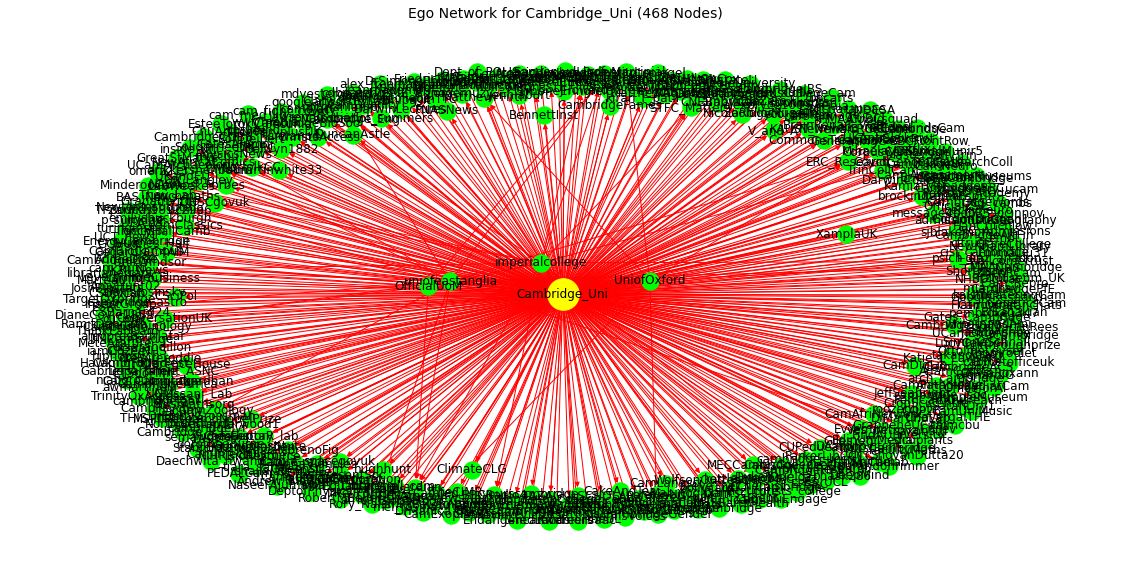

In [72]:
#visualise the users Cambridge_Uni mentioned in their tweets
ego = display_ego(menGraph1, 'Cambridge_Uni')

Here, we can see the 467 users Cambridge_Uni mentioned in their tweets

In [73]:
#display the number of nodes and edges in the second mention graph as well as wheter it's directed or not
print(f"The second mention graph has {menGraph2.number_of_nodes()} nodes and {menGraph2.number_of_edges()} edges")
print(f"Is the second mention graph directed? {nx.is_directed(menGraph2)}")

The second mention graph has 32 nodes and 131 edges
Is the second mention graph directed? True


In [74]:
#display the density of the second mention graph 
print(f"The density of the second mention graph is {nx.density(menGraph2)}")

The density of the second mention graph is 0.13205645161290322


In [75]:
#display which universities were mentioned by other universities the most in their tweets
top5 = pd.Series(dict(menGraph2.in_degree()), name='Number of Times Mentioned')
pd.DataFrame(top5).sort_values(by='Number of Times Mentioned', ascending=False).head()

Number of Times Mentioned
tcddublin                           10
UCC                                  9
UniofOxford                          9
ucddublin                            9
nuigalway                            8

Here, we can see that amongst the universities, tcddublin was mentioned the most by other universities in their tweets

In [76]:
#disply which universities mentioned other universities the most in their tweets
top5 = pd.Series(dict(menGraph2.out_degree()), name='Number of Users Mentioned')
pd.DataFrame(top5).sort_values(by='Number of Users Mentioned', ascending=False).head()

Number of Users Mentioned
MaynoothUni                           12
MTU_Kerry                              8
tcddublin                              7
WeAreTUDublin                          7
RCSI_Irl                               7

Here, we can see that amongst the universities, MaynoothUni mentioned other universities the most in their tweets

In [77]:
#get the top 10 nodes with the highest degree centralities
degCentrality_descending(menGraph2, 10)

tcddublin       0.548387
MaynoothUni     0.516129
UCC             0.451613
UL              0.451613
RCSI_Irl        0.419355
UniofOxford     0.387097
ucddublin       0.387097
nuigalway       0.354839
QUBelfast       0.322581
Cambridge_Uni   0.322581
dtype: float64


Here, we can see that tcddublin has the highest degree centrality in the second mention graph, meaning that their node has the most edges

In [78]:
#get the top 10 nodes with the highest closeness centralities
closeCentrality_descending(menGraph2, 10)

UniofOxford     0.527859
tcddublin       0.509338
ucddublin       0.492072
Cambridge_Uni   0.453629
nuigalway       0.420757
OfficialUoM     0.418919
UL              0.414747
QUBelfast       0.414747
RCSI_Irl        0.403226
DCU             0.403226
dtype: float64


Here, we can see that UniofOxford has the highest closeness centrality in the second metion graph, meaning that their node is closest to all other nodes in the graph

In [79]:
#get the top 10 nodes with the highest betweenness centralities
betwCentrality_descending(menGraph2, 10)

UniofOxford       0.201661
tcddublin         0.185685
MaynoothUni       0.142240
Cambridge_Uni     0.129224
UCC               0.119165
UL                0.105375
EdinburghUni      0.087419
UofGlasgow        0.086918
imperialcollege   0.082096
LimerickIT        0.068031
dtype: float64


Here, we can see that UniofOxford has the highest betweenness centrality in the second metion graph, meaning that their node occurs on the most shortest paths between other nodes in the subgraphs of which they are in

In [80]:
#get the top 10 nodes with the highest eigenvector centralities
eigCentrality_descending(menGraph2, 10)

tcddublin     0.462781
ucddublin     0.393018
nuigalway     0.348498
QUBelfast     0.327115
UL            0.293349
UCC           0.268005
RCSI_Irl      0.236871
DCU           0.222745
MaynoothUni   0.208332
UniofOxford   0.173935
dtype: float64


Here, we can see that tcddublin has the highest eigenvector centrality in the second mention network, meaning that their node is connected to the most central nodes in the network

I would like to create an ego network around the tcddublin node since they have both the most number of edges and is connected to the most central nodes in the network

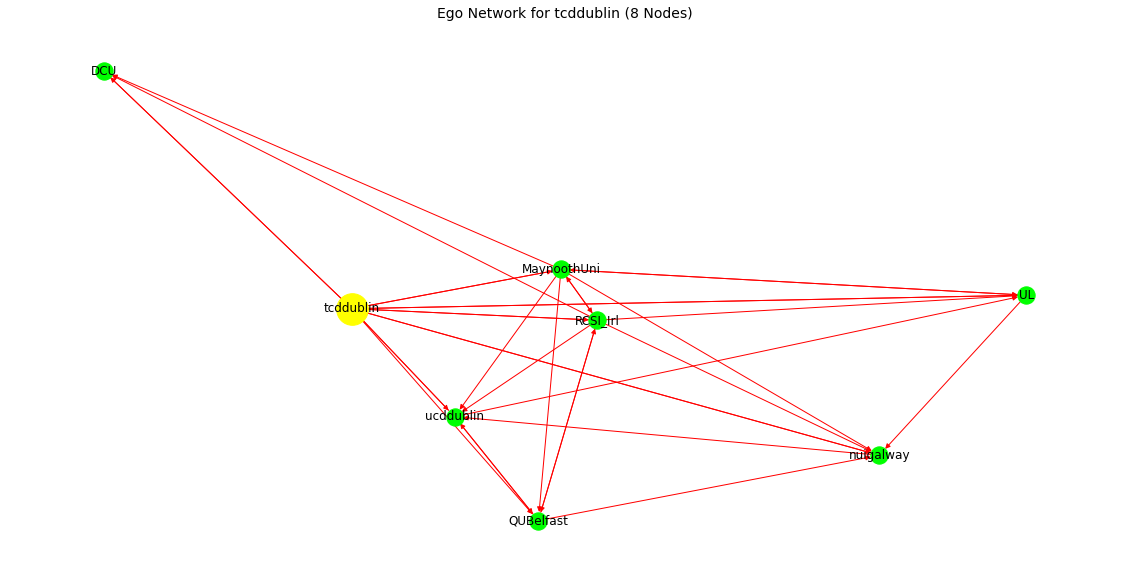

In [81]:
#visualise the users from the members_list.jsonl file that tcddublin mentioned in their tweets
ego = display_ego(menGraph2, 'tcddublin')

Here, we can see the 7 users from the list_members.jsonl file tcddublin mentioned in their tweets

# Task 4 - User-Hashtag Network

## (i) Construction

In [82]:
#create two lists, one to keep track of the user ids and their hashtags
#the other to create pairs of users screen names and their hashtags
users_hashtag = []
pairs = []

for index, row in tweets.iterrows():
    for element in range(len(row['entities']['hashtags'])):
        #convert user ids and their hashtags to string objects
        user_id = str(row['user']['id'])
        hashtag = str(row['entities']['hashtags'][element]['text'])
        #concatenate the strings
        concat = user_id+hashtag
        #if there has already been an instance of this users id using this hashtag, don't add to the list
        if concat in users_hashtag:
            continue
        else:
            #format the hashtags by adding a # and converting to lowercase to help in 
            #making the graph bipartite
            pairs.append((row['user']['screen_name'], "#{}".format((row['entities']['hashtags'][element]['text']).lower())))
            #append the concatenated string to the users_hashtag list
            users_hashtag.append(concat)

In [83]:
#create a graph object called biGraph1
biGraph = nx.Graph()

#create the bipartite network
user_nodes = set()
hashtag_nodes = set()

#create the nodes and edges where necessary
for pair in pairs:
    if pair[0] not in user_nodes:
        biGraph.add_node(pair[0], bipartite=0)
        user_nodes.add(pair[0])
    if pair[1] not in hashtag_nodes:
        biGraph.add_node(pair[1], bipartite=1)
        hashtag_nodes.add(pair[1])
    hashtag_nodes.add(pair[1])
    biGraph.add_edge(pair[0], pair[1])

In [84]:
#ensure graph is bipartite
from networkx.algorithms import bipartite
bipartite.is_bipartite(biGraph)

True

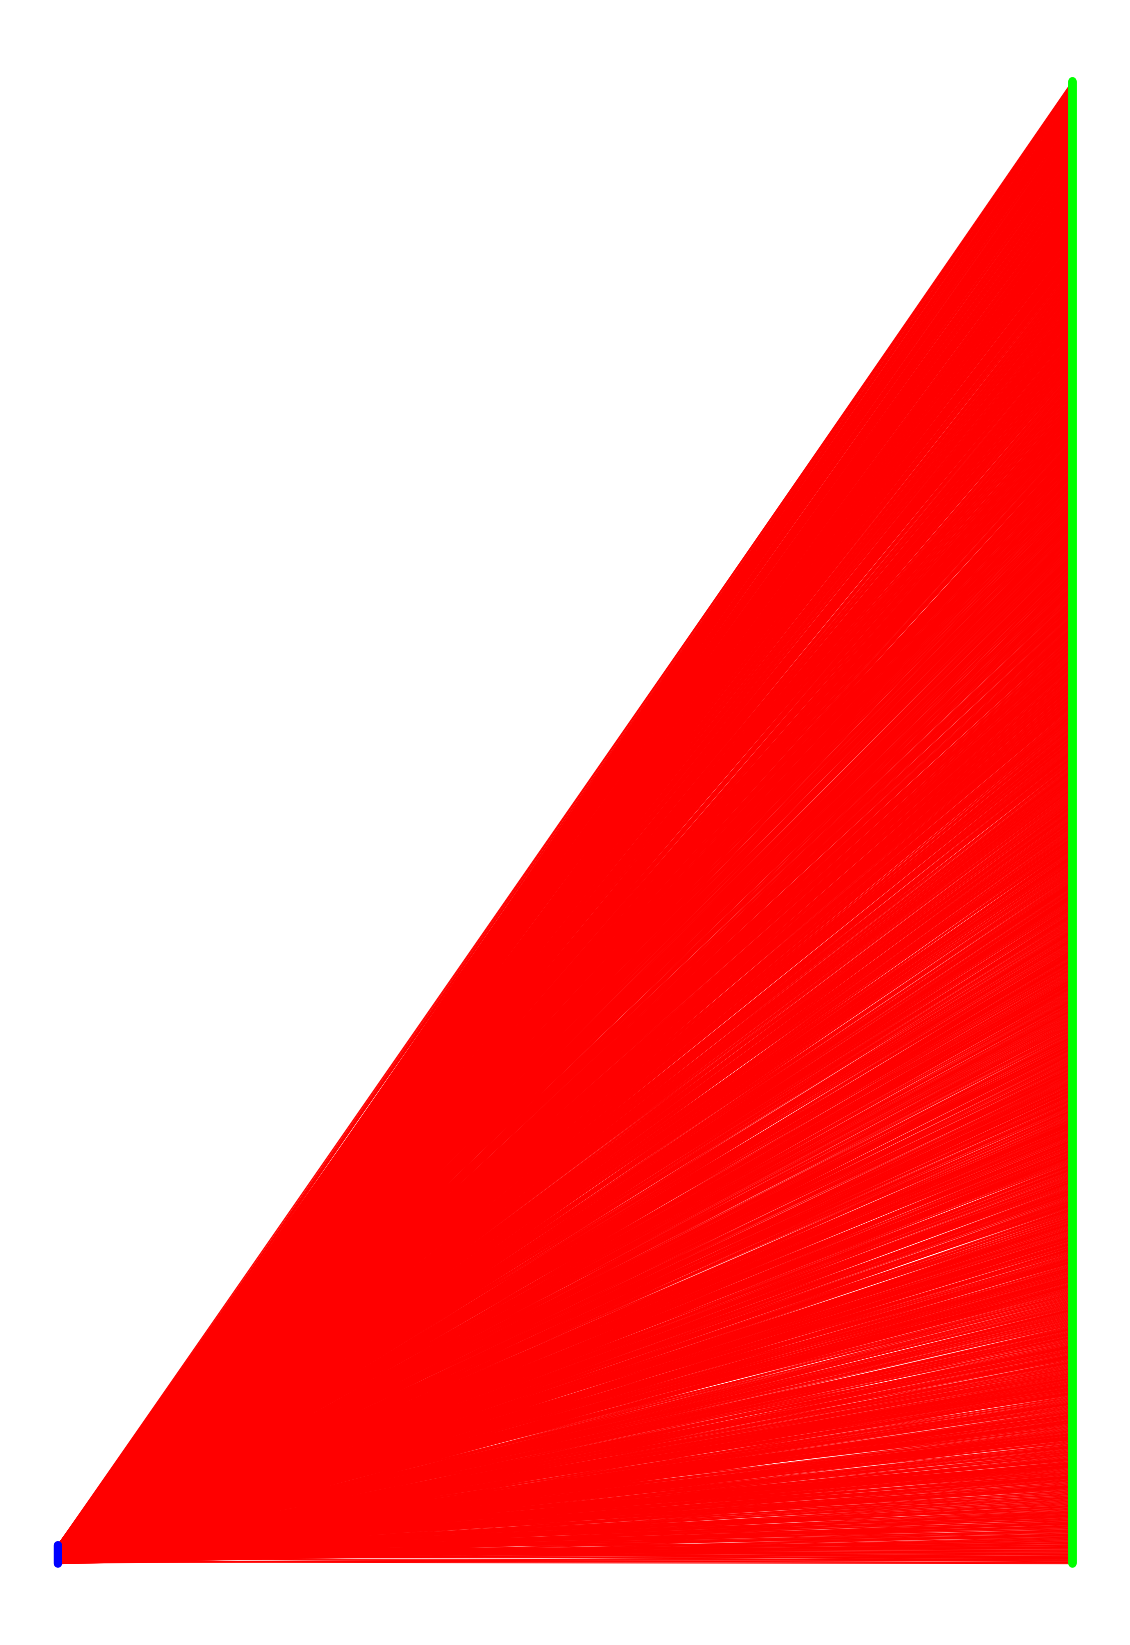

In [85]:
#manually set the node colours and positions
color_map = {}
pos = {}
for index, node in enumerate(user_nodes):
    pos[node] = (0, index*10)
    color_map[node] = "blue"
for index, node in enumerate(hashtag_nodes):
    pos[node] = (1, index*10)
    color_map[node] = "lime"
colors = [color_map[node] for node in biGraph.nodes()]
#make the figure size much larger to better illustrate the graph    
plt.figure(figsize=(20,30))
#draw the graph
nx.draw_networkx(biGraph, pos=pos, with_labels=False, node_size = 50, font_size = 9, node_color = colors, edge_color='red')
plt.axis("off")
plt.show()

This bipartite graph illustrates how few users tend to use many hashtags

## (ii) Characterisation

In [86]:
#display the number of nodes and edges in the user-hashtag graph as well as wheter it's directed or not
print(f"The user-hashtag graph has {biGraph.number_of_nodes()} nodes and {biGraph.number_of_edges()} edges")
print(f"Is the user-hashtag graph directed? {nx.is_directed(biGraph)}")

The user-hashtag graph has 2595 nodes and 3422 edges
Is the user-hashtag graph directed? False


In [87]:
#display the density of the user-hashtag graph as well as the number of connected components it has
print(f"The density of the user-hashtag graph is {nx.density(biGraph)}")
print(f"The user-hashtag graph has {nx.number_connected_components(biGraph)} connected component")

The density of the user-hashtag graph is 0.0010167230439891673
The user-hashtag graph has 1 connected component


In [88]:
#display the top 10 hashtags that are used the most
hashtag_freq = pd.Series(dict(biGraph.degree(hashtag_nodes, weight='weight')))
print(hashtag_freq.sort_values(ascending=False).head(10))

#covid19                 31
#covid                   17
#coronavirus             12
#blackhistorymonth       12
#research                12
#worldmentalhealthday    11
#staysafe                10
#engineering             10
#mentalhealth            10
#classof2020             10
dtype: int64


Here, we can see that #covid19 was the most frequently used hashtag in the network, interestingly, the second and third most used hashtags are also related to COVID-19

In [89]:
#display the top 5 users who used the most hashtags
user_hashtag_freq = pd.Series(dict(biGraph.degree(user_nodes, weight='weight')))
print(user_hashtag_freq.sort_values(ascending=False).head(5))

Cambridge_Uni      374
QUBelfast          175
MTU_Cork           166
tcddublin          163
uniofeastanglia    157
dtype: int64


Here, we can see that Cambridge_Uni used more than double the amount of hashtags in their tweets than any other user

In [90]:
#get the top 10 nodes with the highest degree centralities
degCentrality_descending(biGraph, 10)

Cambridge_Uni     0.144179
QUBelfast         0.067463
MTU_Cork          0.063994
tcddublin         0.062837
uniofeastanglia   0.060524
RCSI_Irl          0.058982
WeAreTUDublin     0.055513
KingsCollegeLon   0.053200
UofGlasgow        0.052429
imperialcollege   0.047417
dtype: float64


Here, we can se that Cambridge_Uni has the highest degree centrality, meaning that their node has the most edges in the graph

In [91]:
#get the top 10 nodes with the highest closeness centralities
closeCentrality_descending(biGraph, 10)

#covid19          0.488053
Cambridge_Uni     0.370466
#covid            0.358733
QUBelfast         0.350541
tcddublin         0.349407
uniofeastanglia   0.348843
RCSI_Irl          0.348469
WeAreTUDublin     0.347628
#research         0.347395
KingsCollegeLon   0.347070
dtype: float64


Here, we can see that #covid19 has the highest closeness centrality, meaning that their node is closest to all other nodes in the graph, what is interesting that the two nodes with the highest closeness centralities also happen to be the hashtag that was used the most and the user who used the most hashtags respectively

In [92]:
#get the top 10 nodes with the highest betweenness centralities
betwCentrality_descending(biGraph, 10)

Cambridge_Uni     0.225668
#covid19          0.199385
MTU_Cork          0.100850
QUBelfast         0.097557
tcddublin         0.092212
RCSI_Irl          0.091695
uniofeastanglia   0.087513
WeAreTUDublin     0.080014
KingsCollegeLon   0.079485
UofGlasgow        0.073867
dtype: float64


Here, we can see that Cambridge_Uni has the highest closeness centrality, meaning that their node occurs on the most shortest paths between other nodes in the network

In [93]:
#get the top 10 nodes with the highest eigenvector centralities
eigCentrality_descending(biGraph, 10)

Cambridge_Uni     0.623464
QUBelfast         0.133483
uniofeastanglia   0.111407
tcddublin         0.109977
#covid19          0.107918
KingsCollegeLon   0.089979
imperialcollege   0.081531
UofGlasgow        0.081151
WeAreTUDublin     0.080518
#covid            0.074892
dtype: float64


Here, we can see that Cambridge_Uni has the highest eigenvector centrality, meaning that their node is connected to the most central nodes in the graph

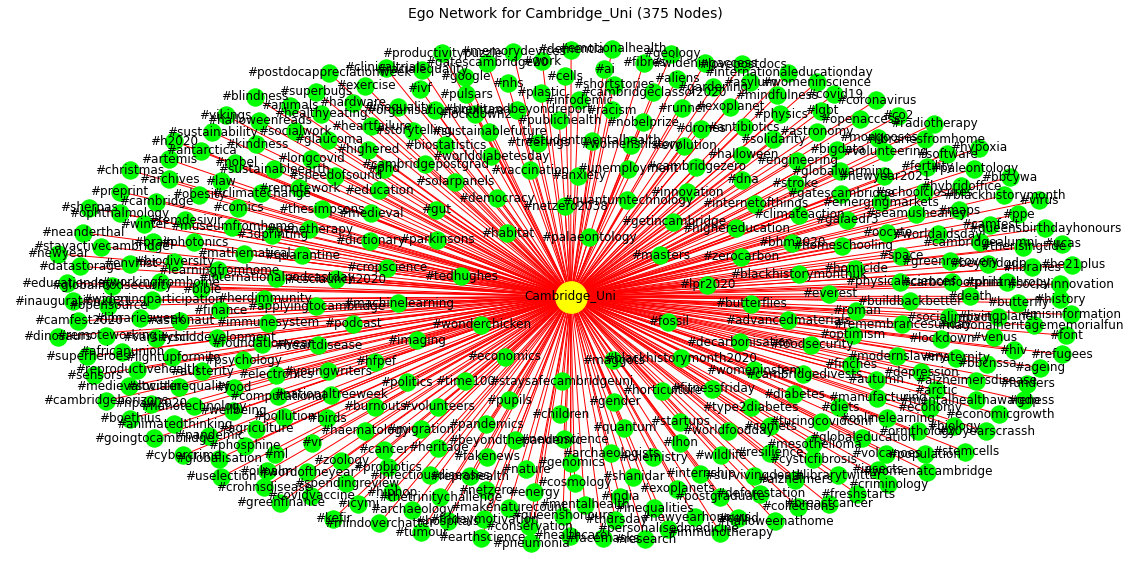

In [94]:
#visualise hashtags used by Cambridge_Uni
ego = display_ego(biGraph, 'Cambridge_Uni')

Here, we can see that Cambridge_Uni used 374 hashtags in their tweets

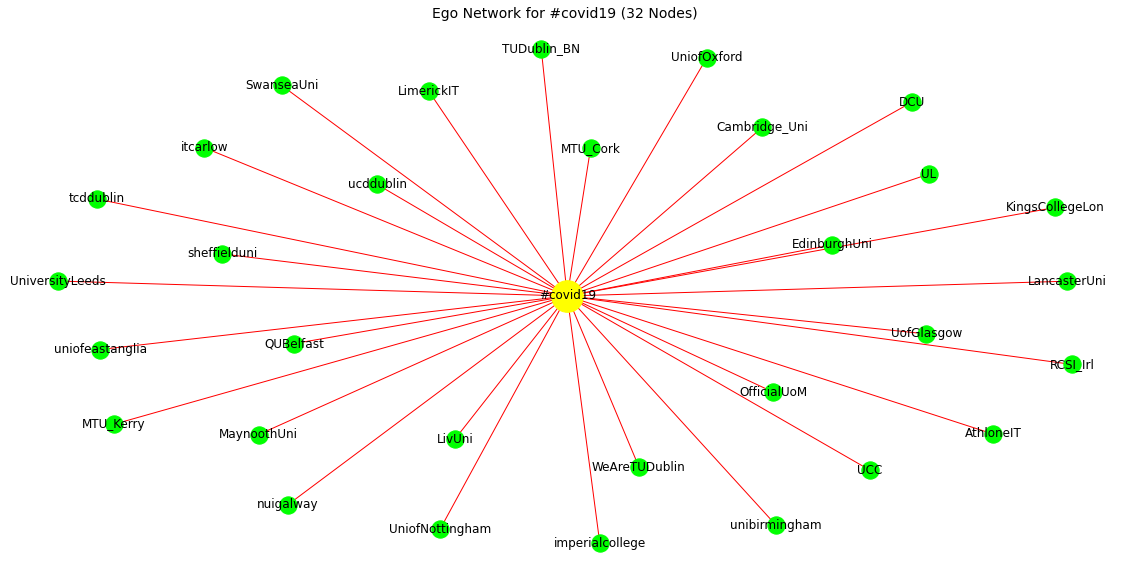

In [95]:
#visualise users who used #covid19 in their tweets
ego = display_ego(biGraph, '#covid19')

Here, we can see that 31 universities used #covid19 in their tweets

# Task 5 - Hashtag Co-Occurrence Network

## (i) Construction

In [96]:
#create an empty list to store co-occurring hashtags
hashtag_pairs = []

#add co-occurring hashtags to the list iteratively if there 
#is more than 1 hashtag in a tweet
for index, row in tweets.iterrows():
    if len(row['entities']['hashtags']) > 1:
        hashtags = []
        for element in range(len(row['entities']['hashtags'])):
            hashtags.append(row['entities']['hashtags'][element]['text'])
        hashtag_pairs.append(hashtags)

In [97]:
#create a dataframe of co-occurring hashtags
hashtag_df = pd.DataFrame(hashtag_pairs)

In [98]:
"""create an empty list to store tuples of hashtags that occur in the same tweet
so that in the event of there being more than two hashtags in one tweet, it will
be listed as (hash1, hash2), (hash1, hash3) instead of (hash1, hash2), (hash1, hash3),
(hash2, hash3), etc."""
pairs = []
for row in range(len(hashtag_df)):
    for col in range(1, len(hashtag_df.columns)):
        if hashtag_df[col][row] == None:
            break
        else:
            pairs.append((hashtag_df[0][row], hashtag_df[col][row]))

In [99]:
#create empty lists to store pairs of hashtags and the number of times they occur
#and another to keep track of pairs that have already been added to the former list
pairs_with_weight = []
pairs_concat_ls = []

#if the pair has already been added to the pairs_concat list, ignore it
#otherwise, add it to the pairs_with_weight list and the pairs_concat list
for pair in pairs:
    pairs_concat = str(pair[0])+str(pair[1])
    if pairs_concat in pairs_concat_ls:
        continue
    else:
        pairs_with_weight.append((pair[0], pair[1], pairs.count(pair)))
        pairs_concat_ls.append(pairs_concat)

In [100]:
#create a graph object called hashGraph1
hashGraph1 = nx.Graph()

#add the weighted edges
for pair in pairs_with_weight:
    hashGraph1.add_edge(pair[0], pair[1], weight=pair[2])

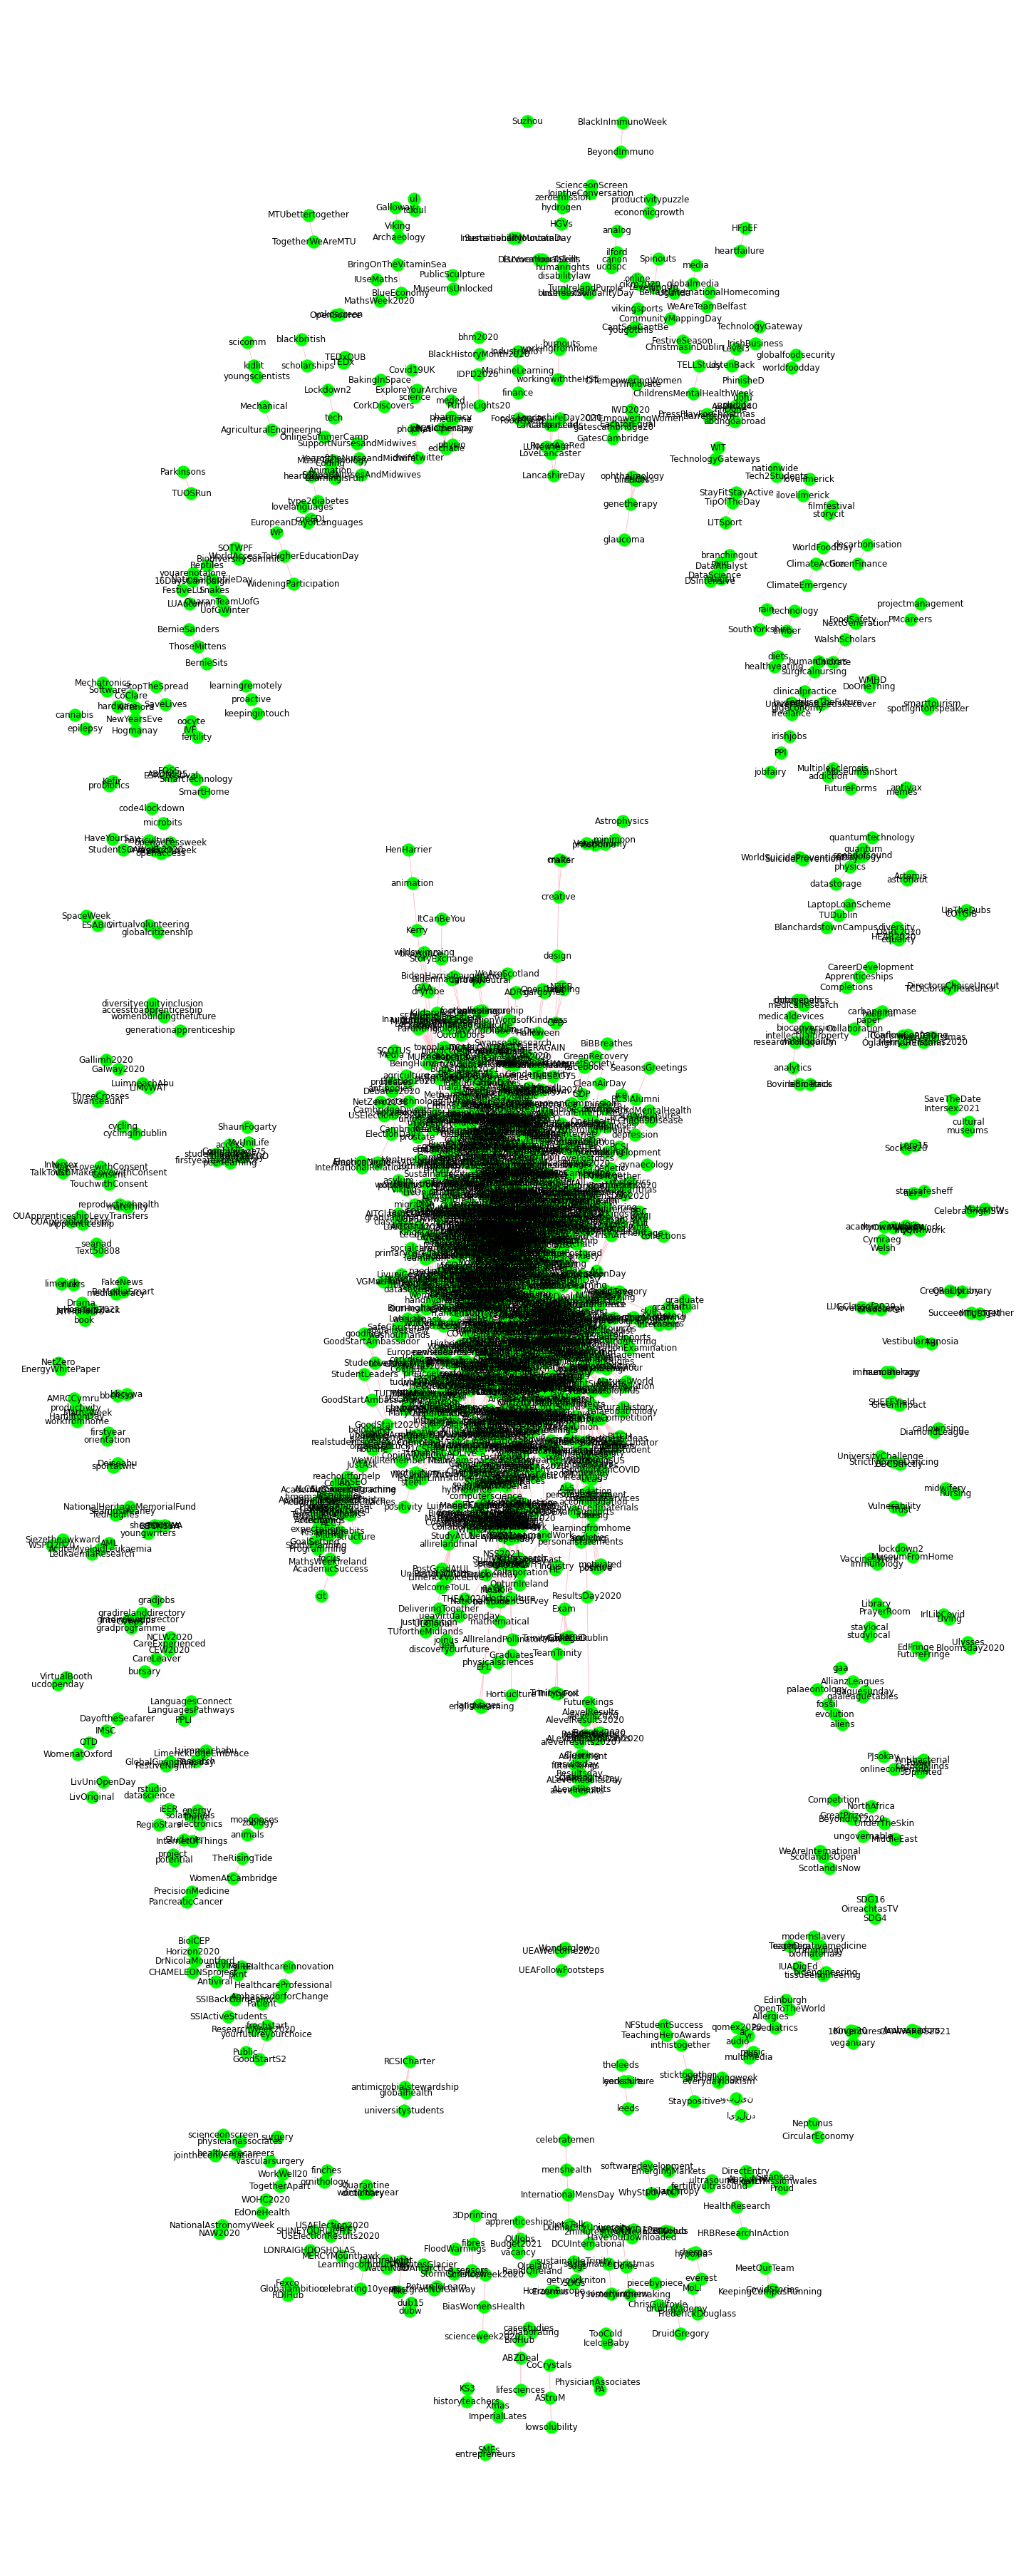

In [101]:
#draw the graph, making the figure size larger to view nodes and edges more clearly
plt.figure(figsize=(20,50)) 
nx.draw_spring(hashGraph1, with_labels=True, node_color="lime", edge_color='pink')
plt.show()

## (ii) Characterisation

In [102]:
#display the number of nodes and edges in the hashtag co-occurrence graph as well as wheter it's directed or not
print(f"The user-hashtag graph has {hashGraph1.number_of_nodes()} nodes and {hashGraph1.number_of_edges()} edges")
print(f"Is the user-hashtag graph directed? {nx.is_directed(hashGraph1)}")

The user-hashtag graph has 2061 nodes and 2268 edges
Is the user-hashtag graph directed? False


In [103]:
#display the density of the hashtag co-occurrence graph as well as the number of connected components it has
print(f"The density of the user-hashtag graph is {nx.density(hashGraph1)}")
print(f"The user-hashtag graph has {nx.number_connected_components(hashGraph1)} connected components")

The density of the user-hashtag graph is 0.0010683851274006868
The user-hashtag graph has 262 connected components


In [104]:
#get the top 20 hashtags that appear together the most in the tweets
hashGraph1_edgelist = nx.to_pandas_edgelist(hashGraph1)
hashGraph1_edgelist.sort_values(by='weight', ascending=False).head(20)

source                  target  weight
711   NorthernIreland                 LoveQUB      32
516        StudyatWIT       WITStudentStories      20
957     WhyStudyatCIT                 STEMCIT      11
1030         JobFairy     HigherEducationJobs      11
1029         JobFairy                  JobsNI      11
208               UEA  ThinkingWithoutBorders      11
198          WeAreDCU                 CAO2021      10
342       ClassOf2020              ABDNfamily      10
1193      WomenInSTEM               OnThisDay      10
336         ABDNgrads             ClassOf2020       9
274              SDG3            GlobalHealth       8
4             COVID19          TrinityExperts       8
325       FutureKings           AlevelResults       8
278              SDG3            HealthForAll       7
434              FOSS            ESRCFestival       7
812          UKatCERN    WorldChangingGlasgow       7
489           CAO2021  StartYourStoryITCarlow       6
491           CAO2021       DiscoverYourStory       6
721           LoveQUB             LoveQUBGrad       6
854       Classof2020               ABDNGrads       6

Here, we can see that NorthernIreland and LoveQUB are the hashtags that appear together in the most tweets

In [105]:
#function to create a histogram of edge weight distribution
def hist_edge_weight_distribution(graph):
    
    #create a dictionary from all the edge weights
    weights = {}
    for node1, node2, data in graph.edges(data=True):
        weights[(node1, node2)] = data['weight']
    
    #convert the dictionary to a Pandas Series for convenience
    s_weights = pd.Series(weights)
    
    #plot a histogram of edge weight distribution
    ax = s_weights.plot.hist(figsize=(11,6), fontsize=14, legend=None, color="lime")
    ax.set_ylabel("Number of Edges", fontsize=14)
    ax.set_xlabel("Weight", fontsize=14)

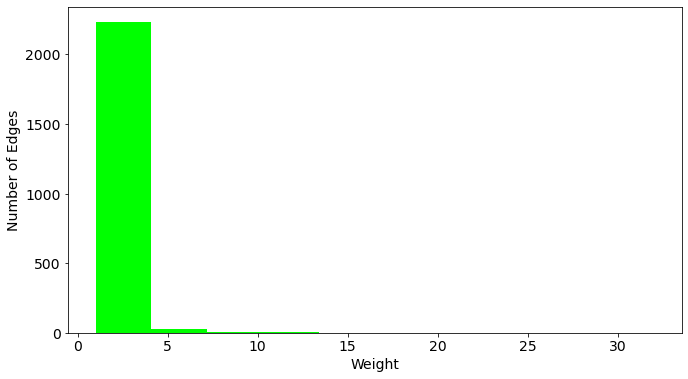

In [106]:
#display the distribution of the number of times hashtags appear together
hist_edge_weight_distribution(hashGraph1)

Here, we can see that the vast majority of hashtags appear together less than five times in all the tweets

In [107]:
#get the top 10 nodes with the highest degree centralities
degCentrality_descending(hashGraph1, 10)

COVID19         0.070388
LoveQUB         0.027670
Cambridge       0.021845
TeamUofG        0.017476
ICYMI           0.014563
CAO2021         0.014563
Covid19         0.013592
climatechange   0.011650
SwanseaUni      0.011165
WhyStudyatCIT   0.010680
dtype: float64


Here, we can see that COVID19 has the highest degree centrality, meaning that their node has the most edges and therefore appears with other hashtags most often in this graph

In [108]:
#get the top 10 nodes with the highest closeness centralities
closeCentrality_descending(hashGraph1, 10)

COVID19           0.214531
ICYMI             0.186641
LoveQUB           0.183087
Cambridge         0.182076
pandemic          0.176371
Christmas         0.176001
climatechange     0.175700
coronavirus       0.175399
Brexit            0.175067
TrinityResearch   0.174372
dtype: float64


Here, we can see that COVID19 has the highest closeness centrality, meaning that their node is closest to all other nodes in the graph

In [109]:
#get the top 10 nodes with the highest betweenness centralities
betwCentrality_descending(hashGraph1, 10)

COVID19         0.269644
LoveQUB         0.079208
Cambridge       0.065931
ICYMI           0.046686
TeamUofG        0.040149
Covid19         0.031599
CAO2021         0.029797
climatechange   0.027190
StaySafe        0.024394
coronavirus     0.022736
dtype: float64


Here, we can see that COVID19 has the highest betweenness centrality, meaning that their node occurs on the most shortest paths between other nodes in the subgraphs of which they are in

In [110]:
#get the top 10 nodes with the highest eigenvector centralities
eigCentrality_descending(hashGraph1, 10)

COVID19                  0.663635
Cambridge                0.139494
LoveQUB                  0.115488
TrinityResearch          0.111424
coronavirus              0.108502
ICYMI                    0.102197
TrinityExperts           0.100584
ThinkingWithoutBorders   0.098492
climatechange            0.094674
Christmas                0.094648
dtype: float64


Here, we can see that COVID19 has by far the highest eigenvector centrality, meaning that their node is connected to the most central nodes in the network

Since COVID19 had the highest centrality measures, I would like to create an ego graph for its node

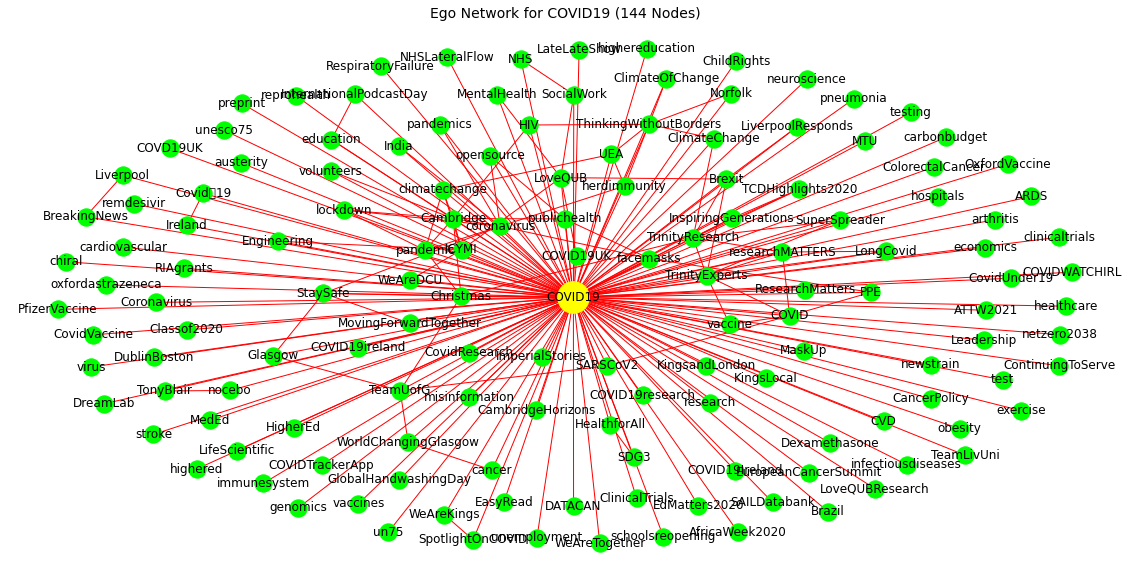

In [111]:
#visualise hashtags that co-occur with COVID19
ego = display_ego(hashGraph1, 'COVID19')

Here, we can see that COVID19 appears with 143 other hashtags in all the tweets